# Questão 1

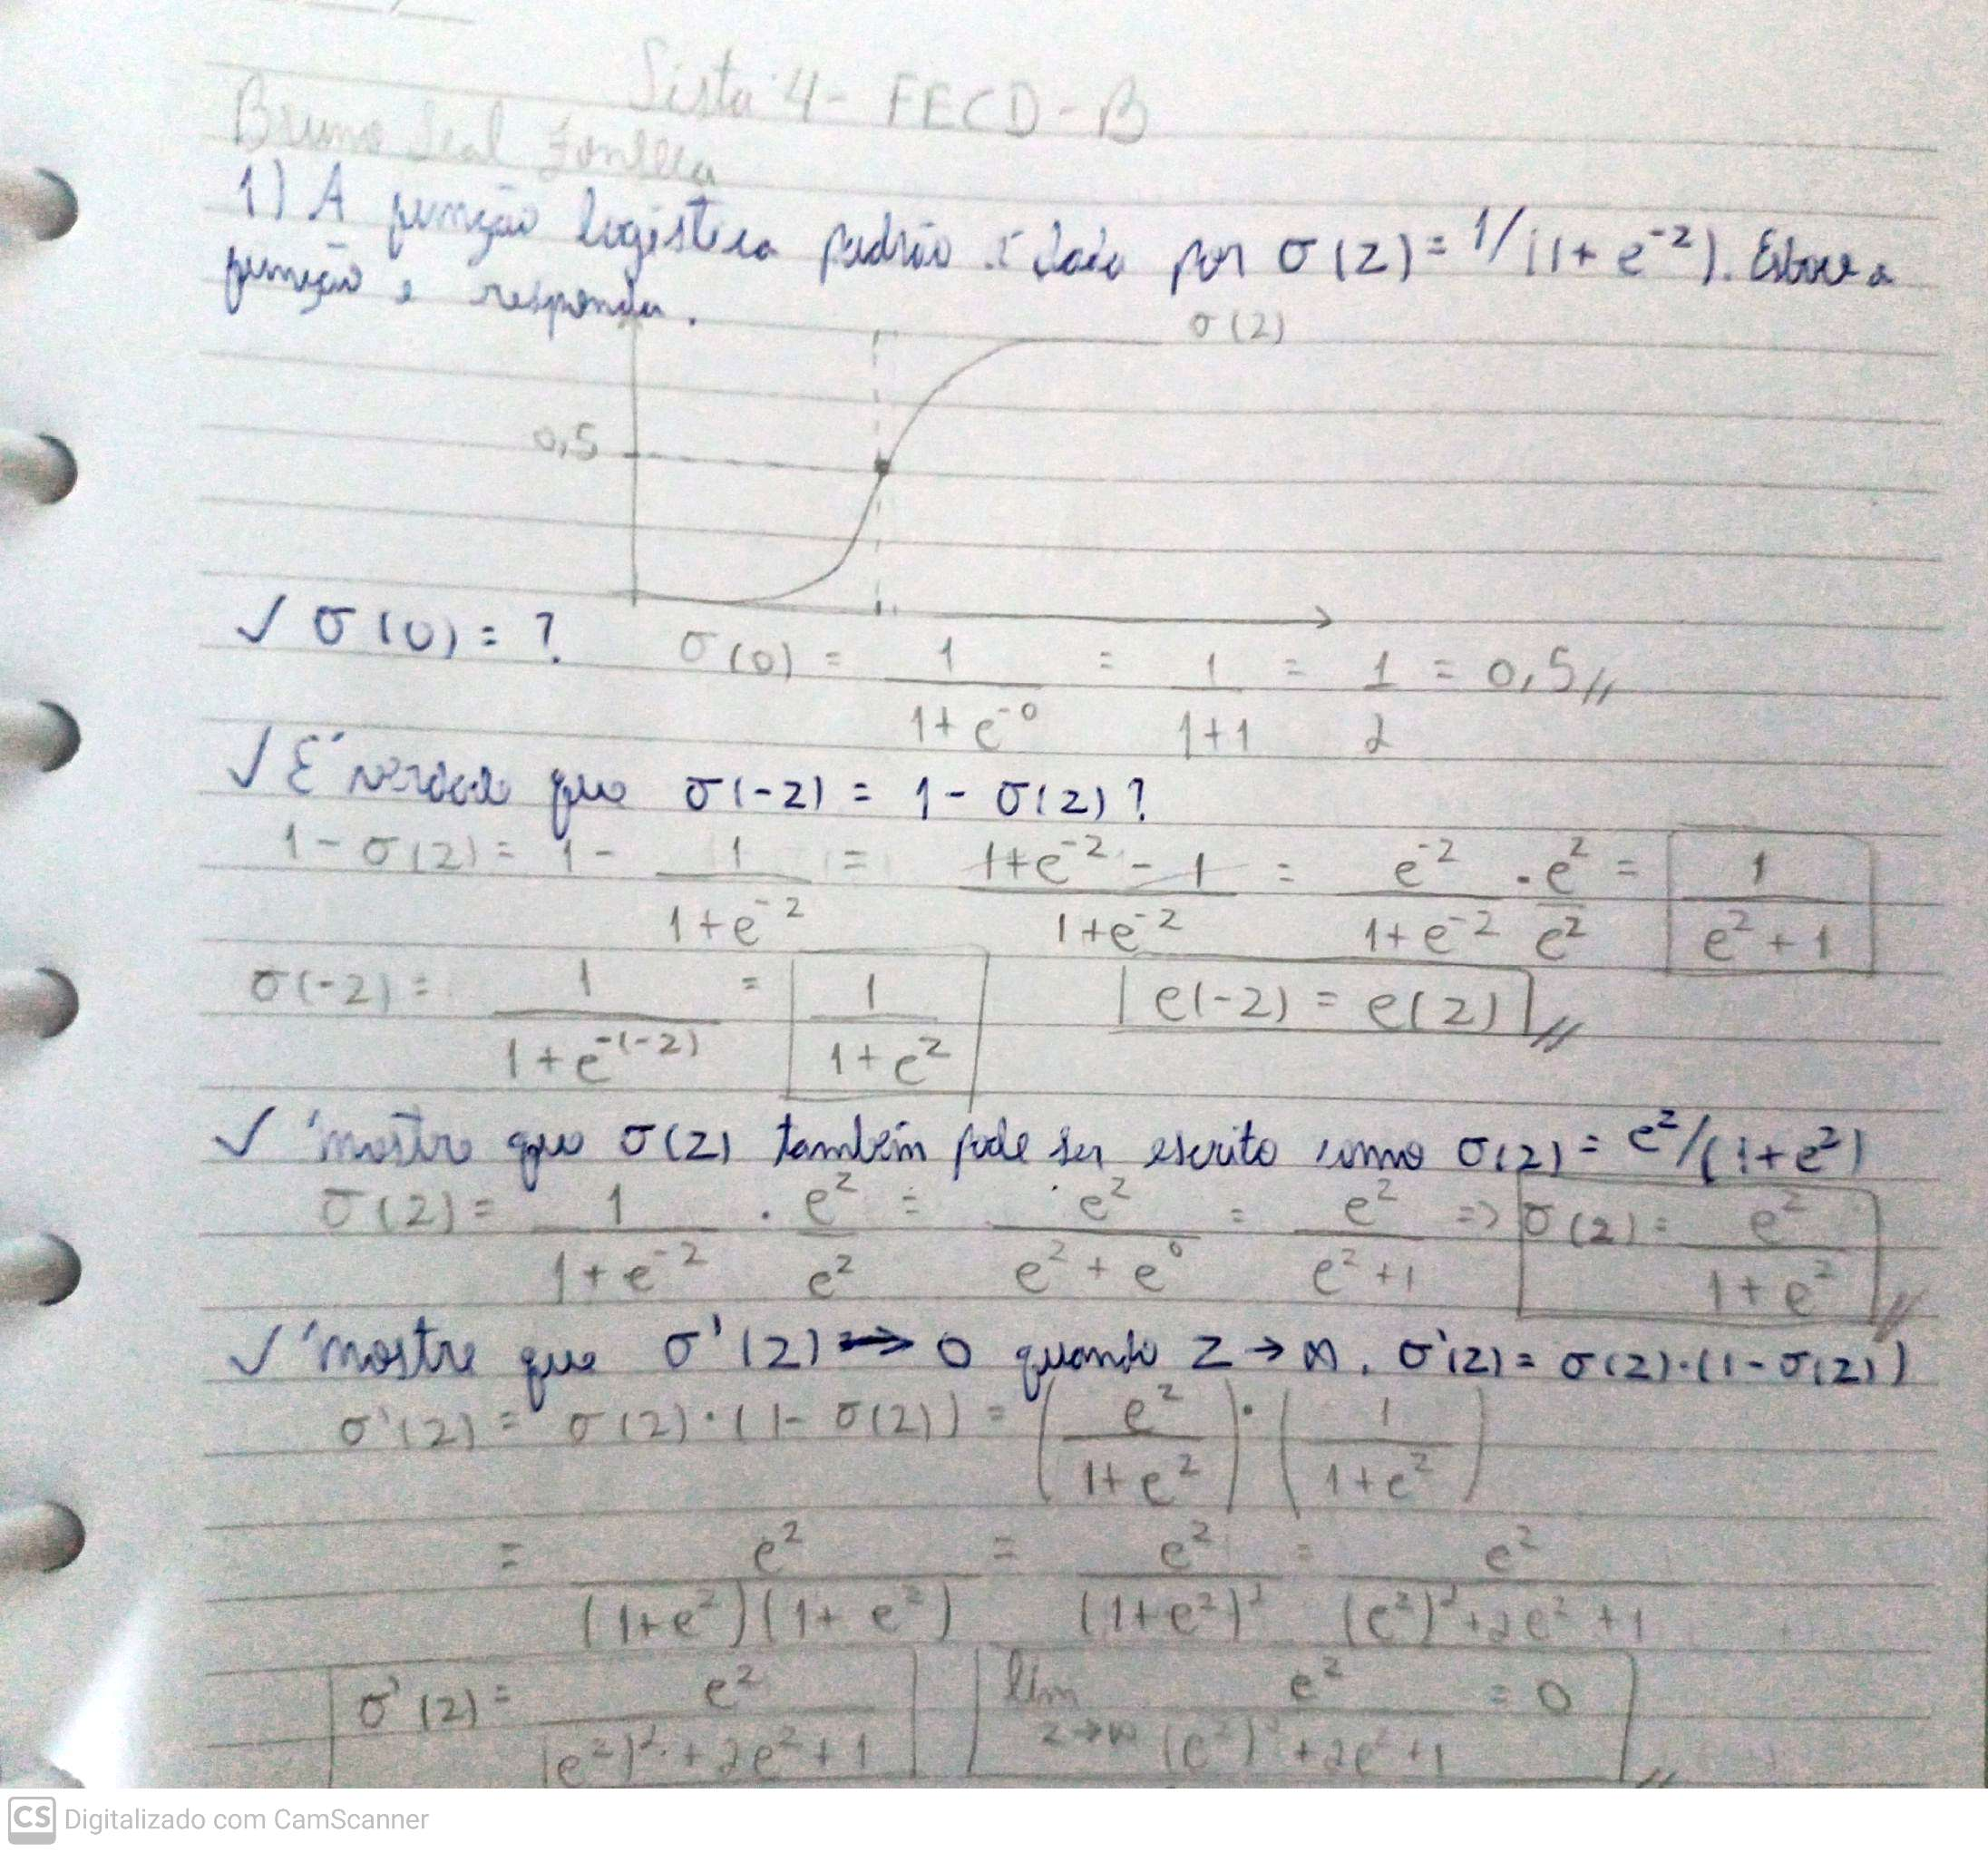

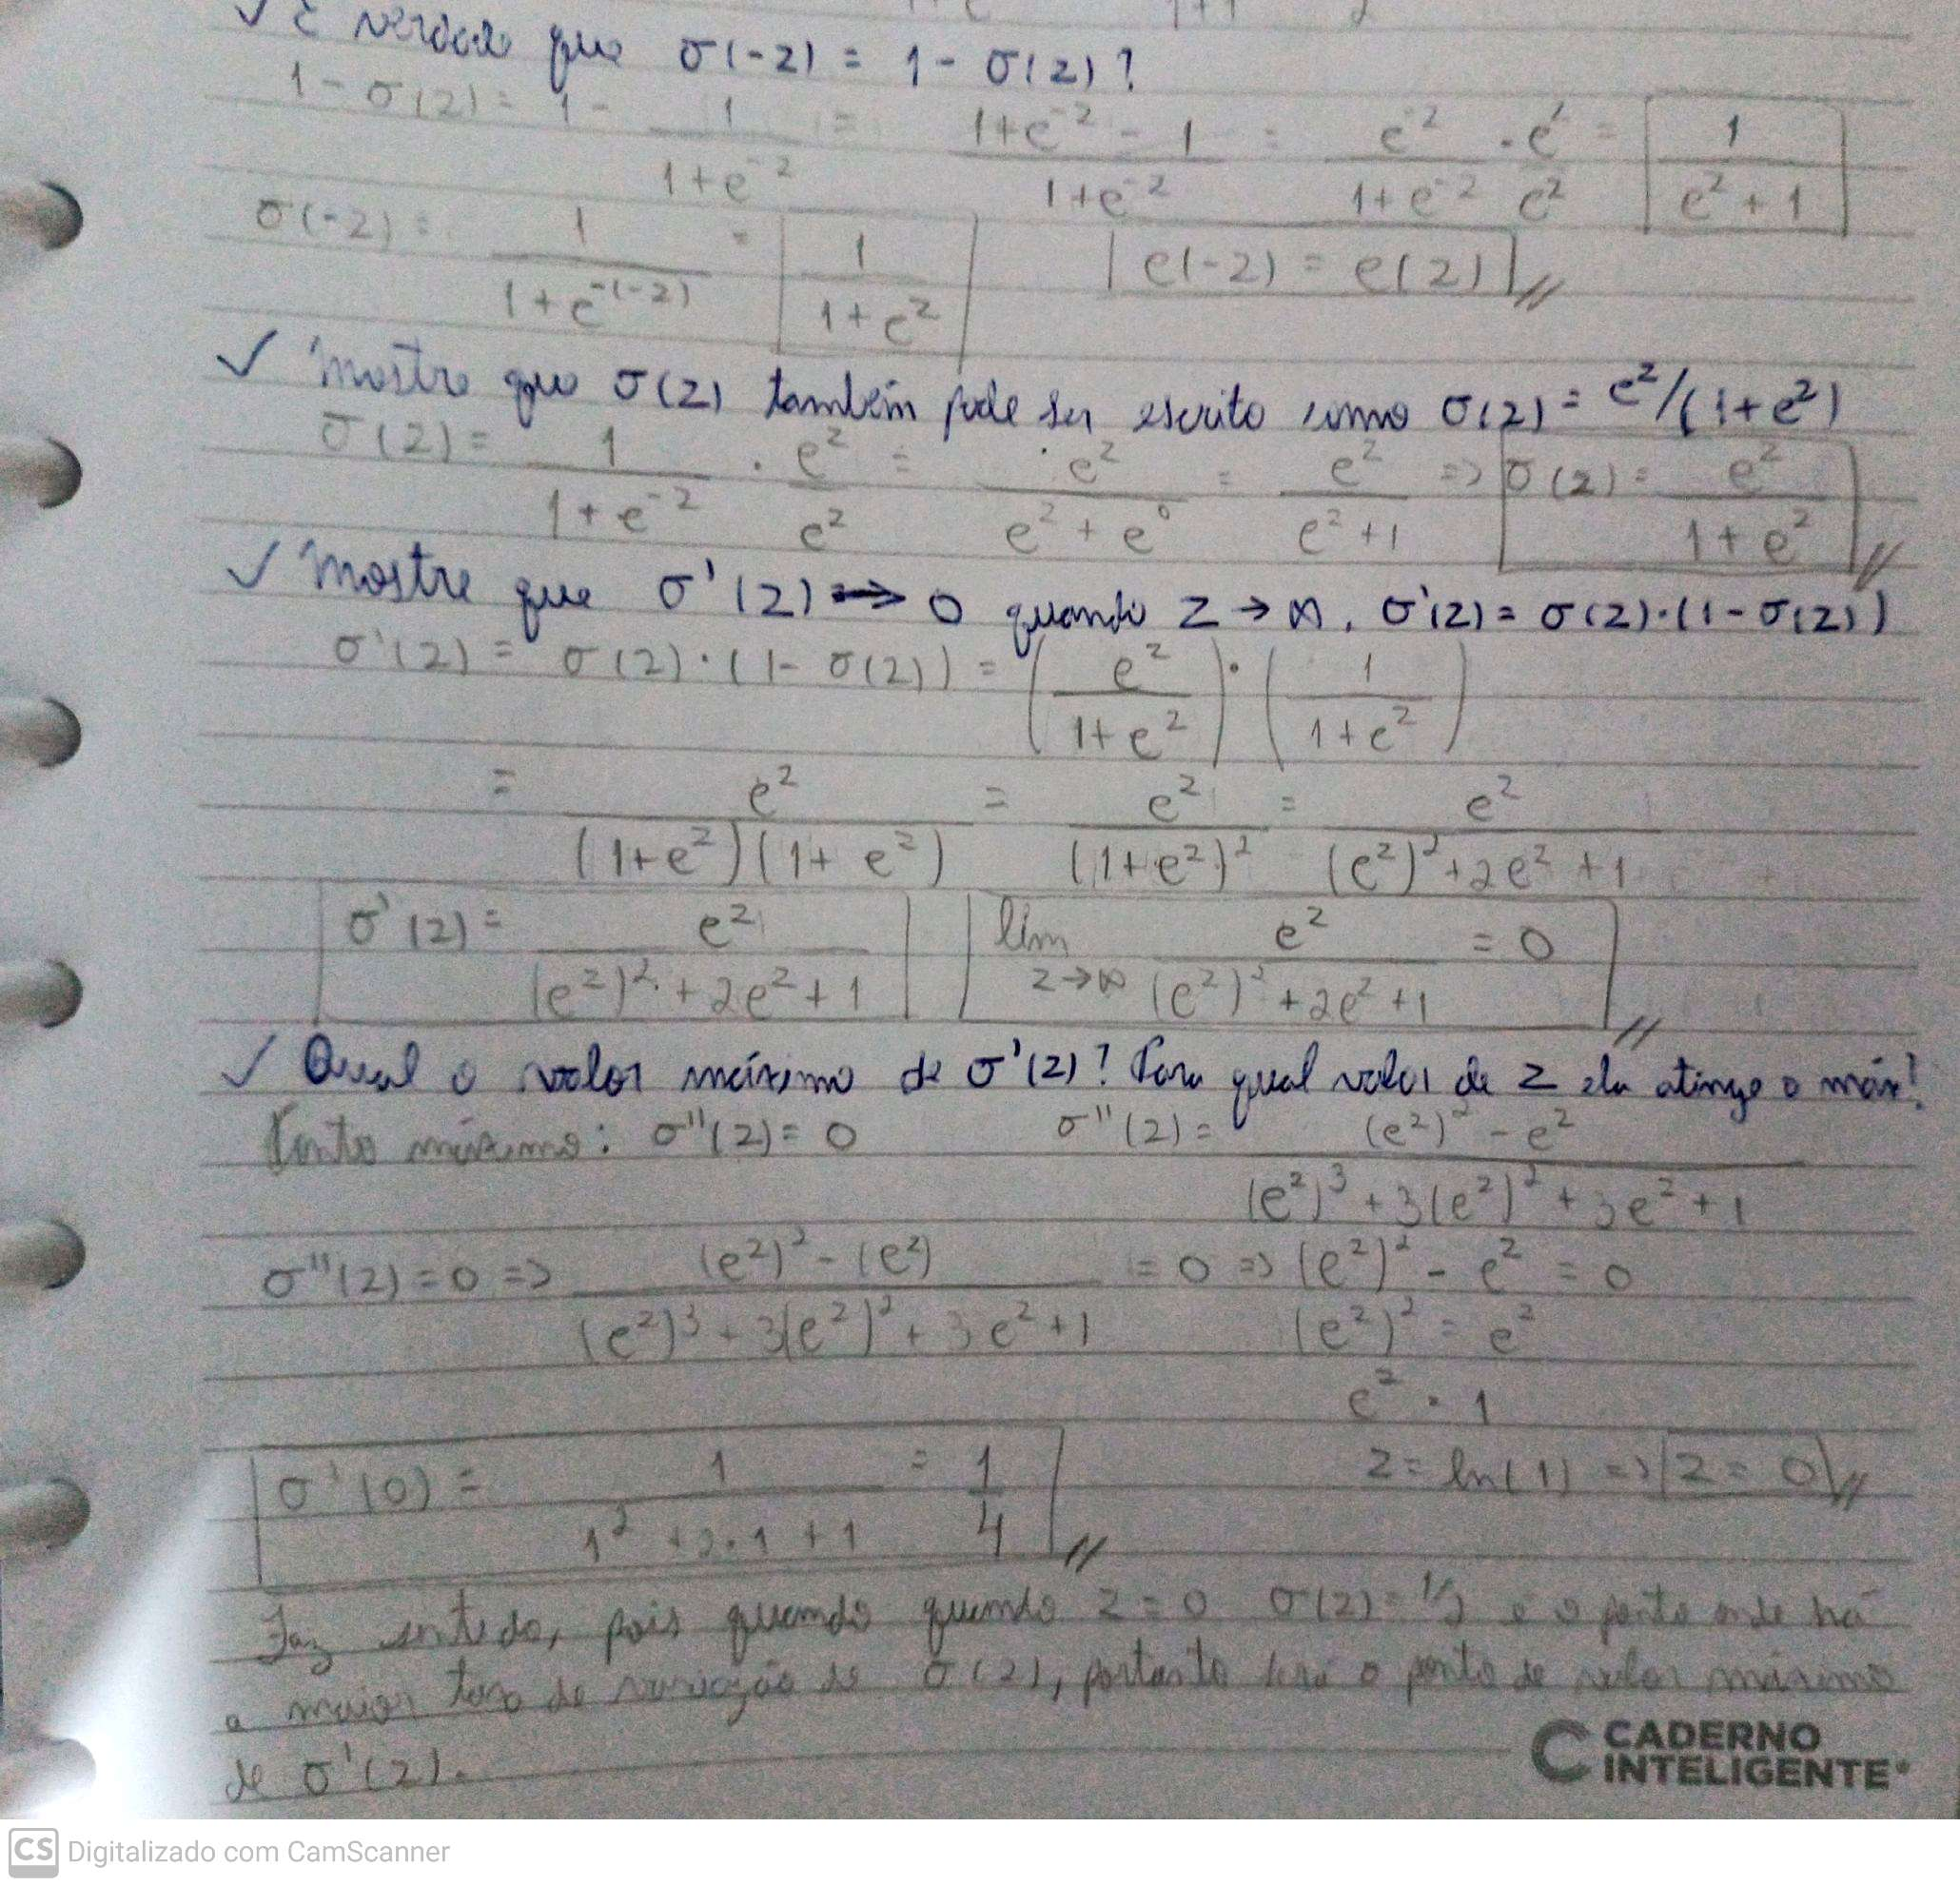

# Questão 2

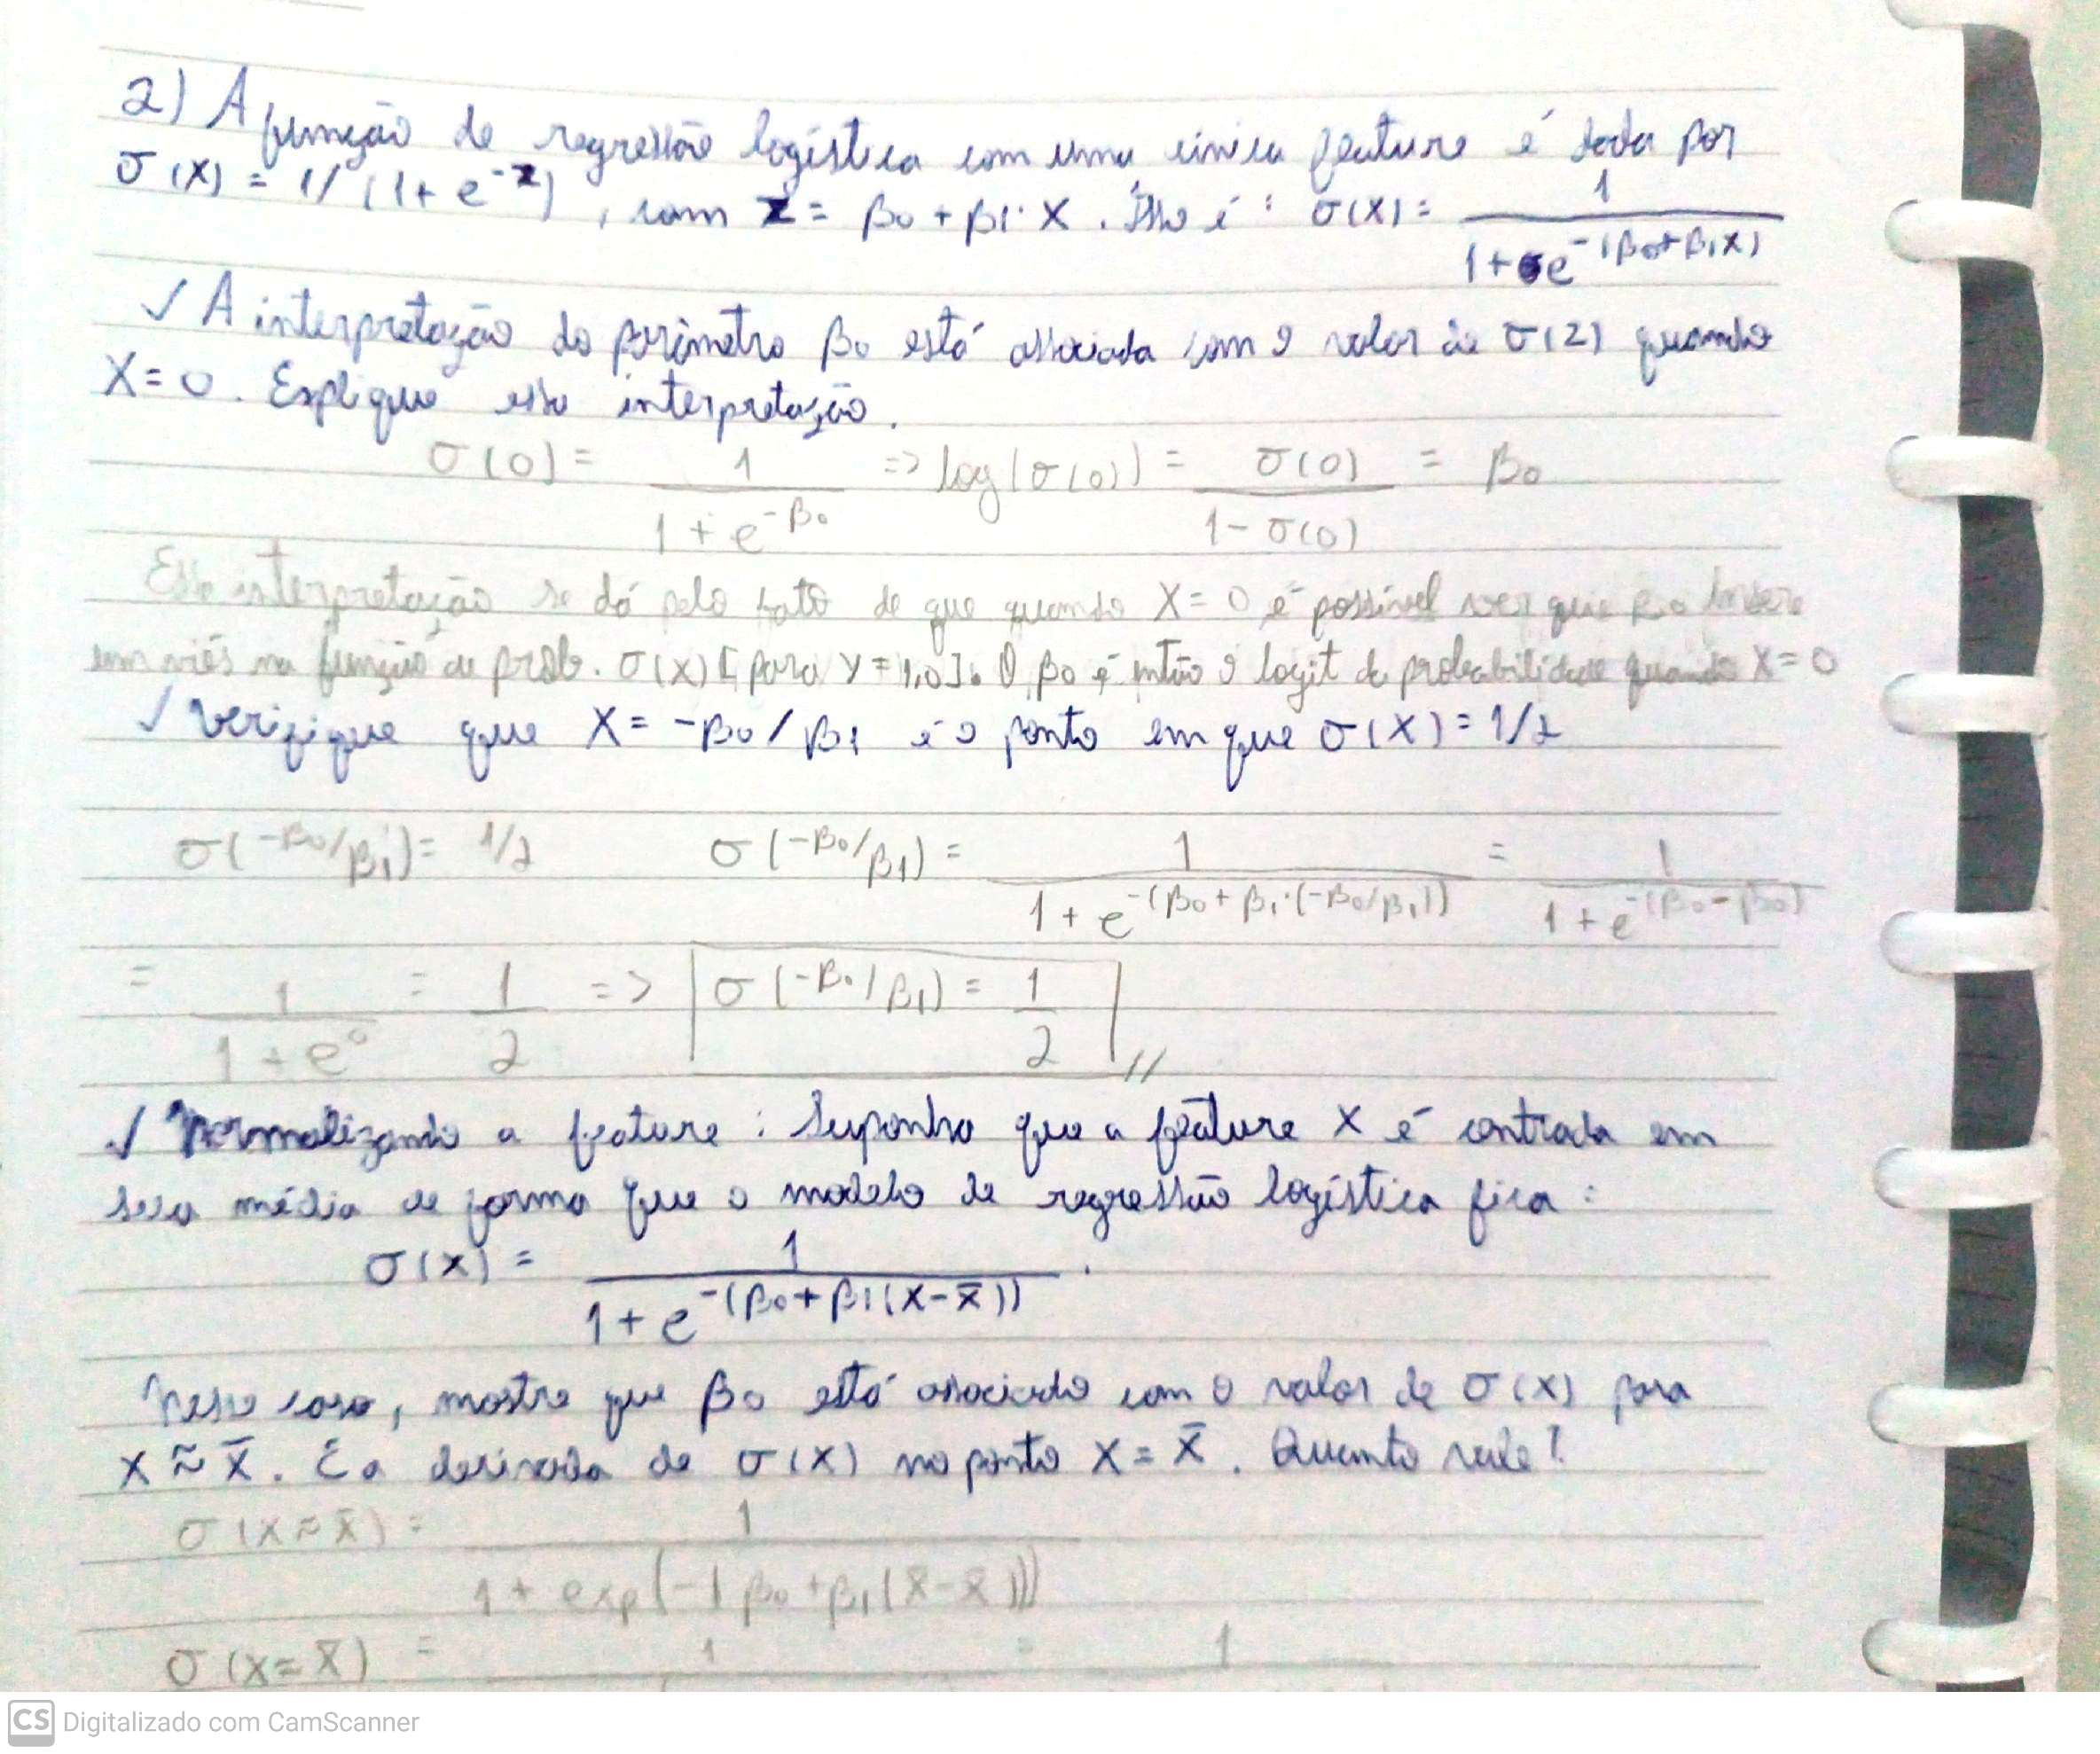

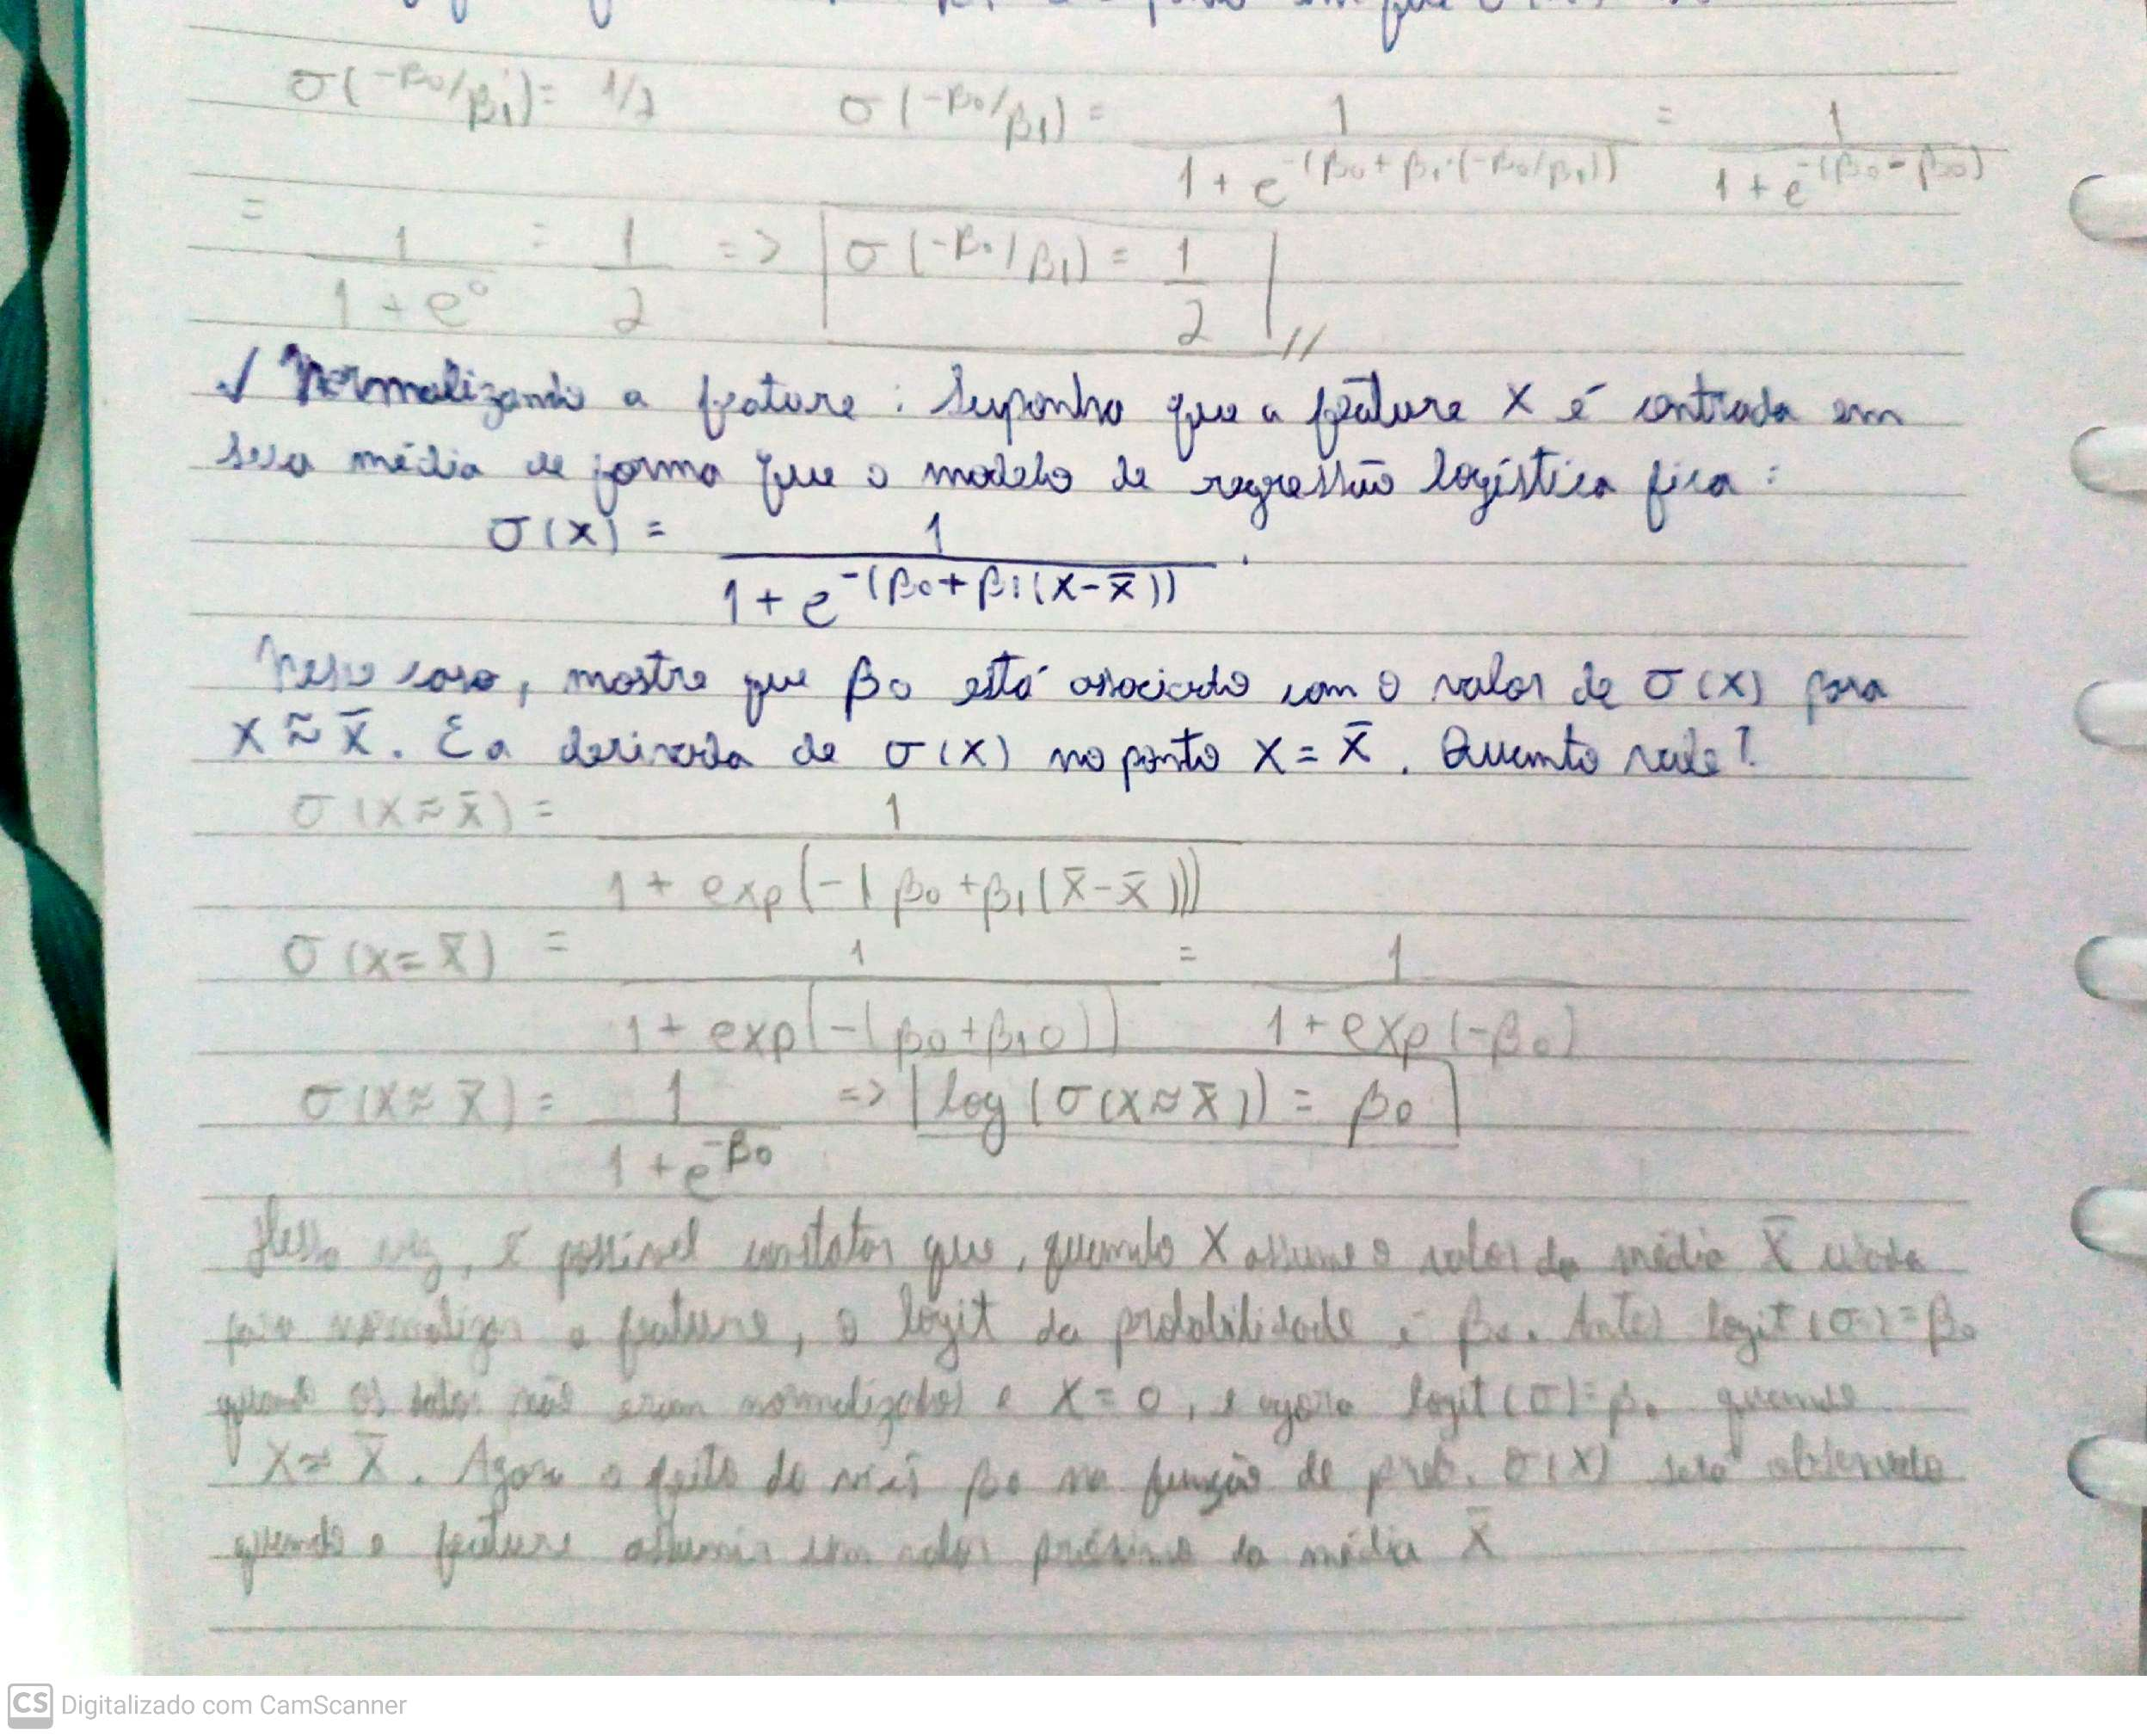

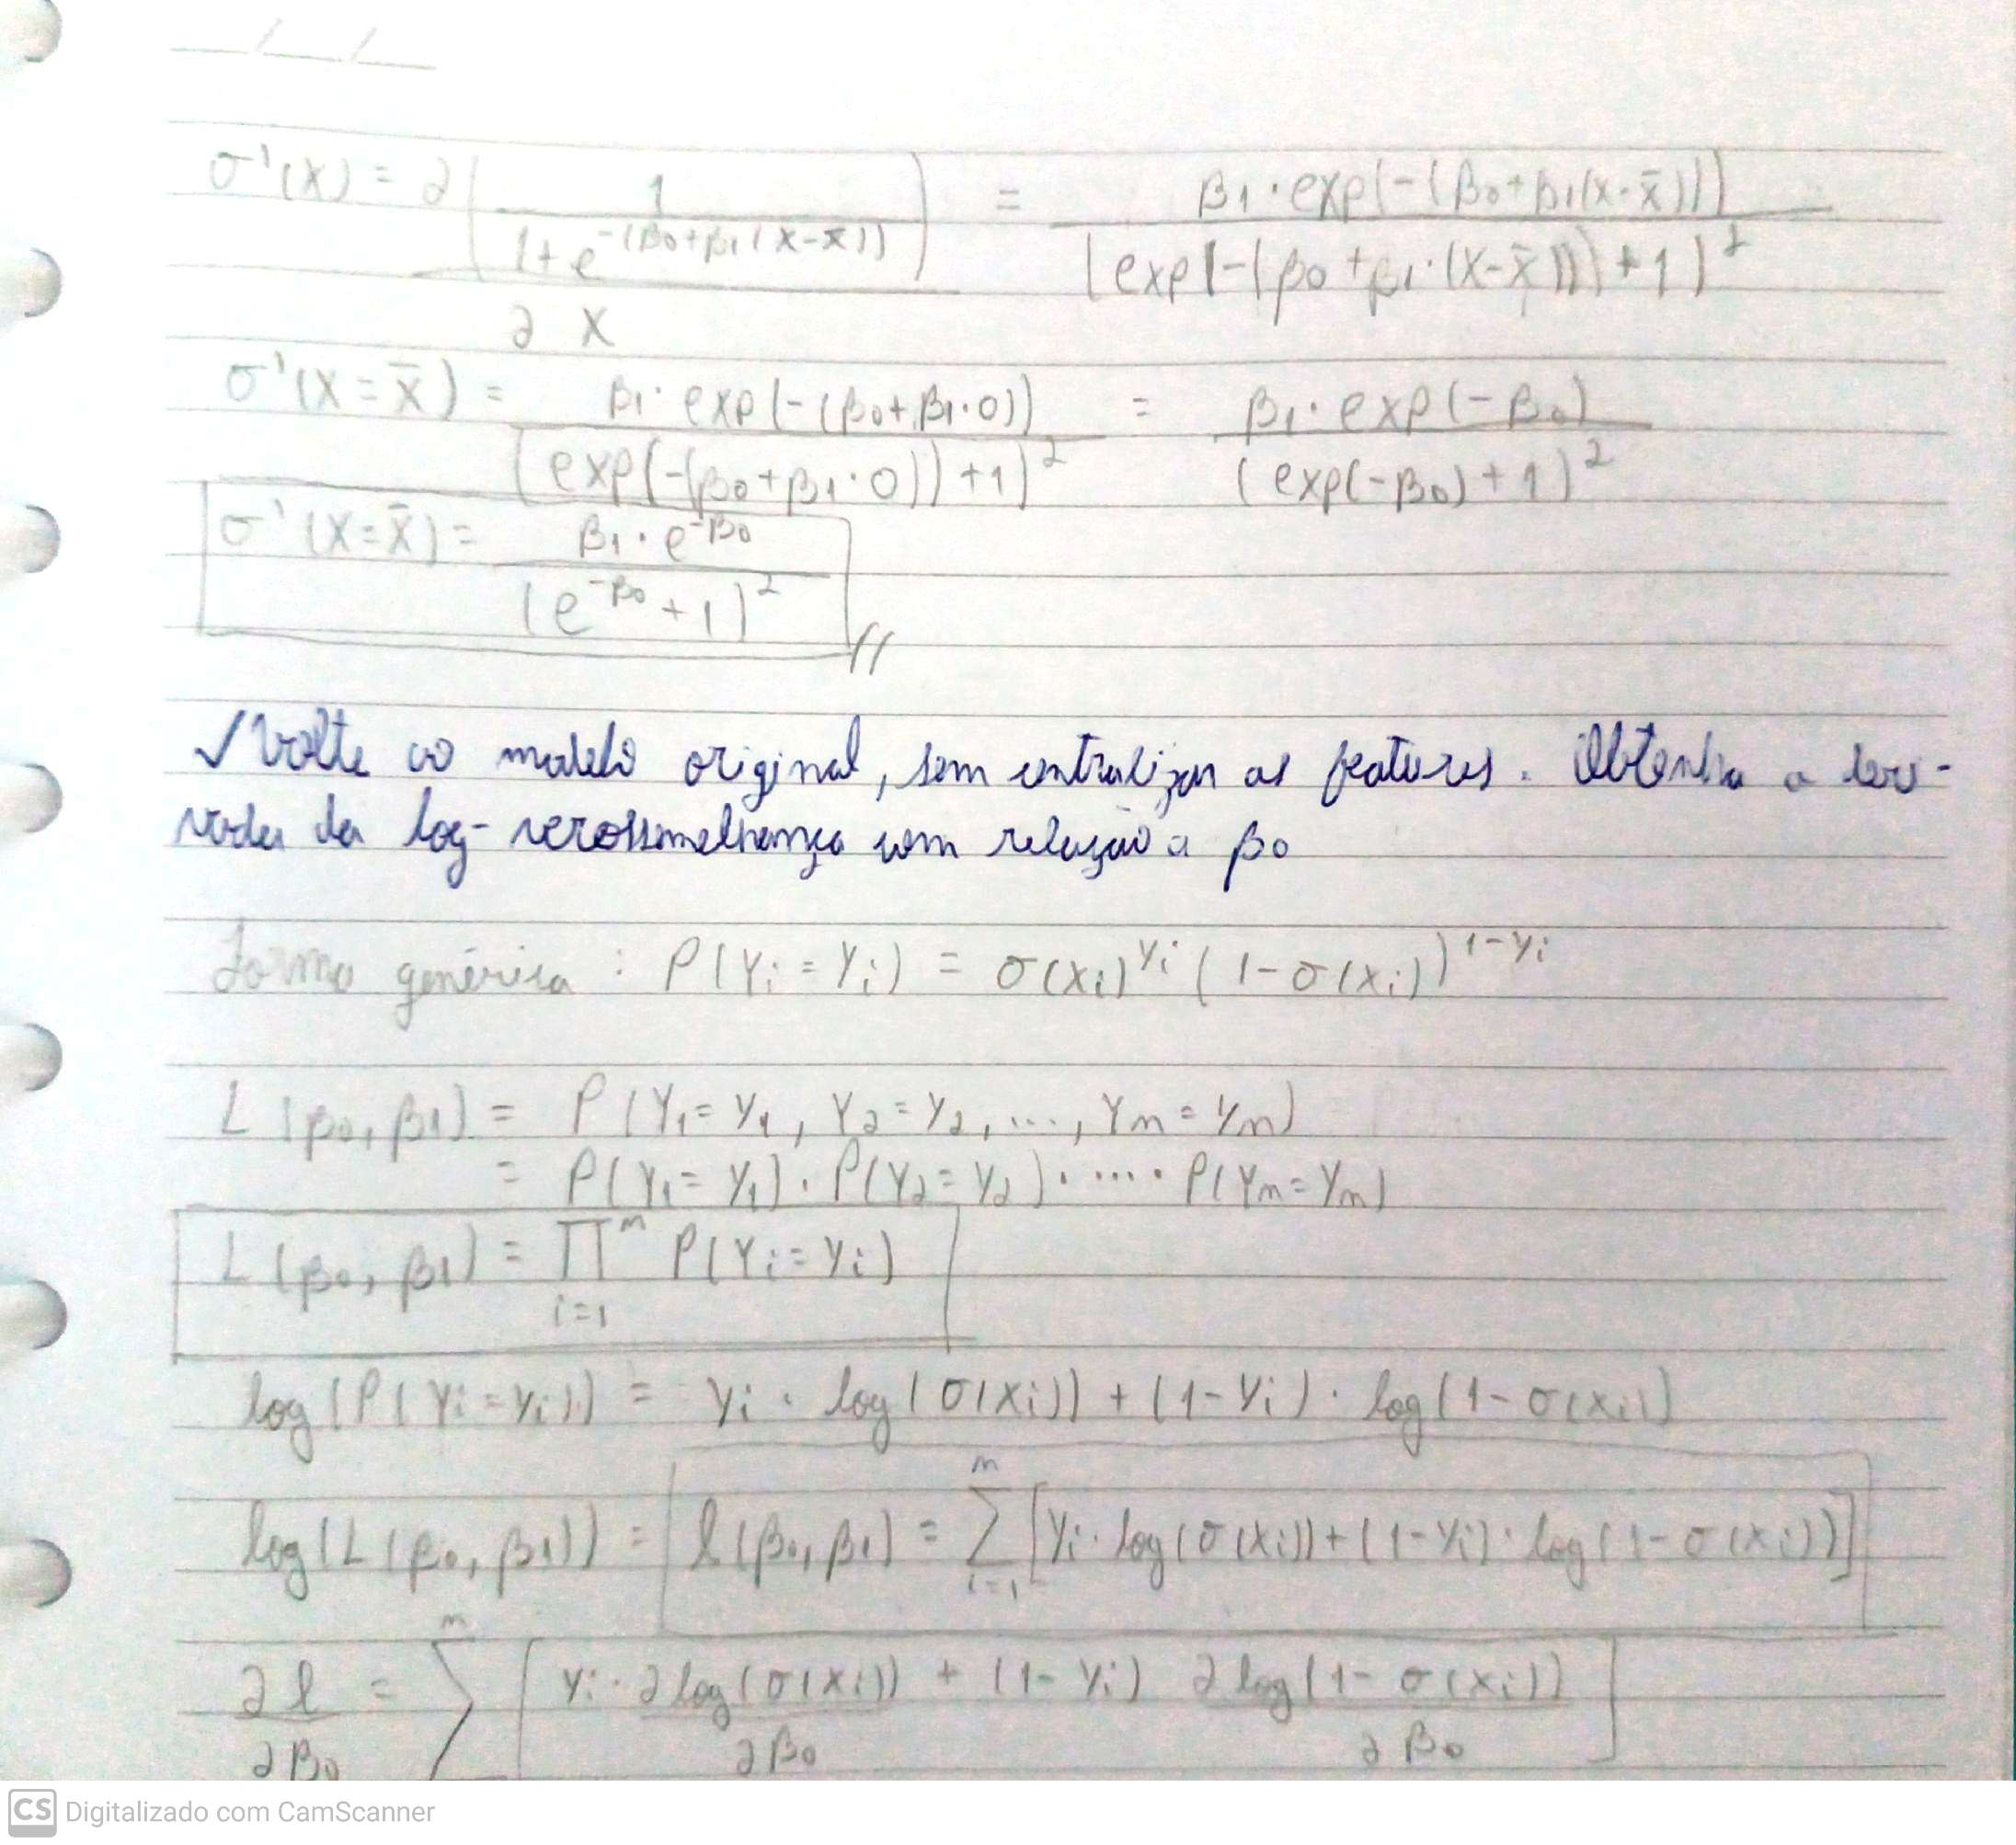

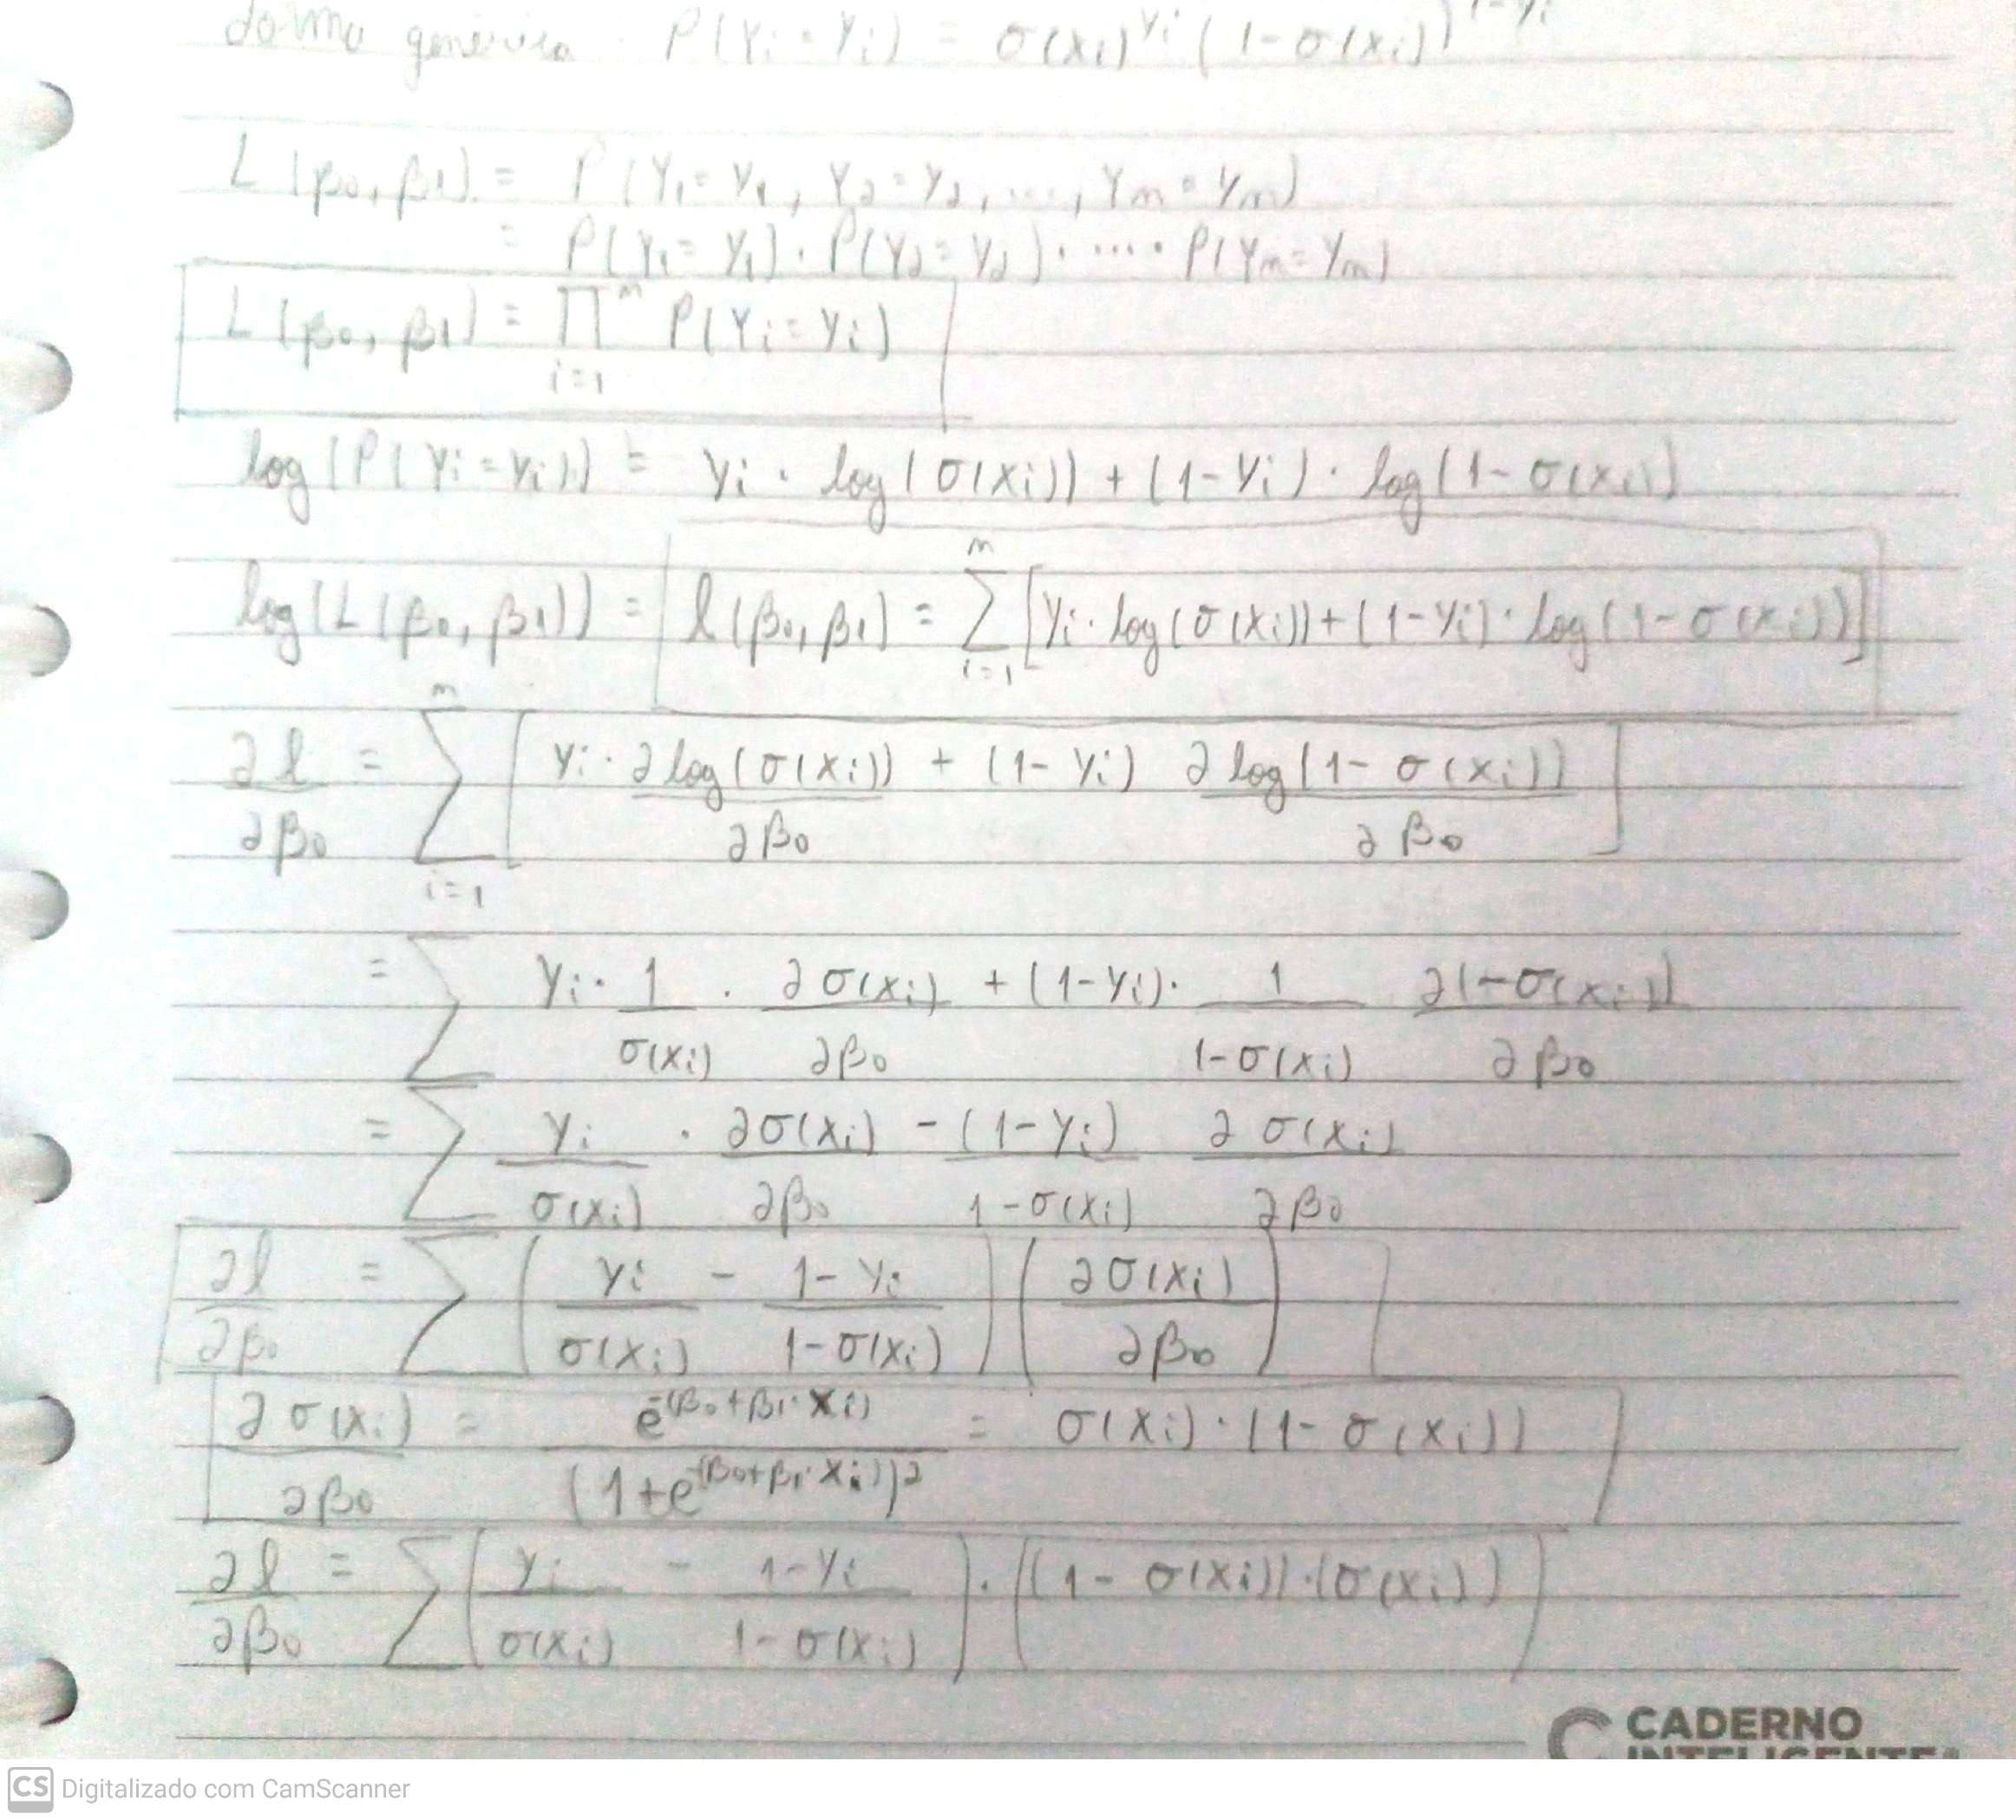

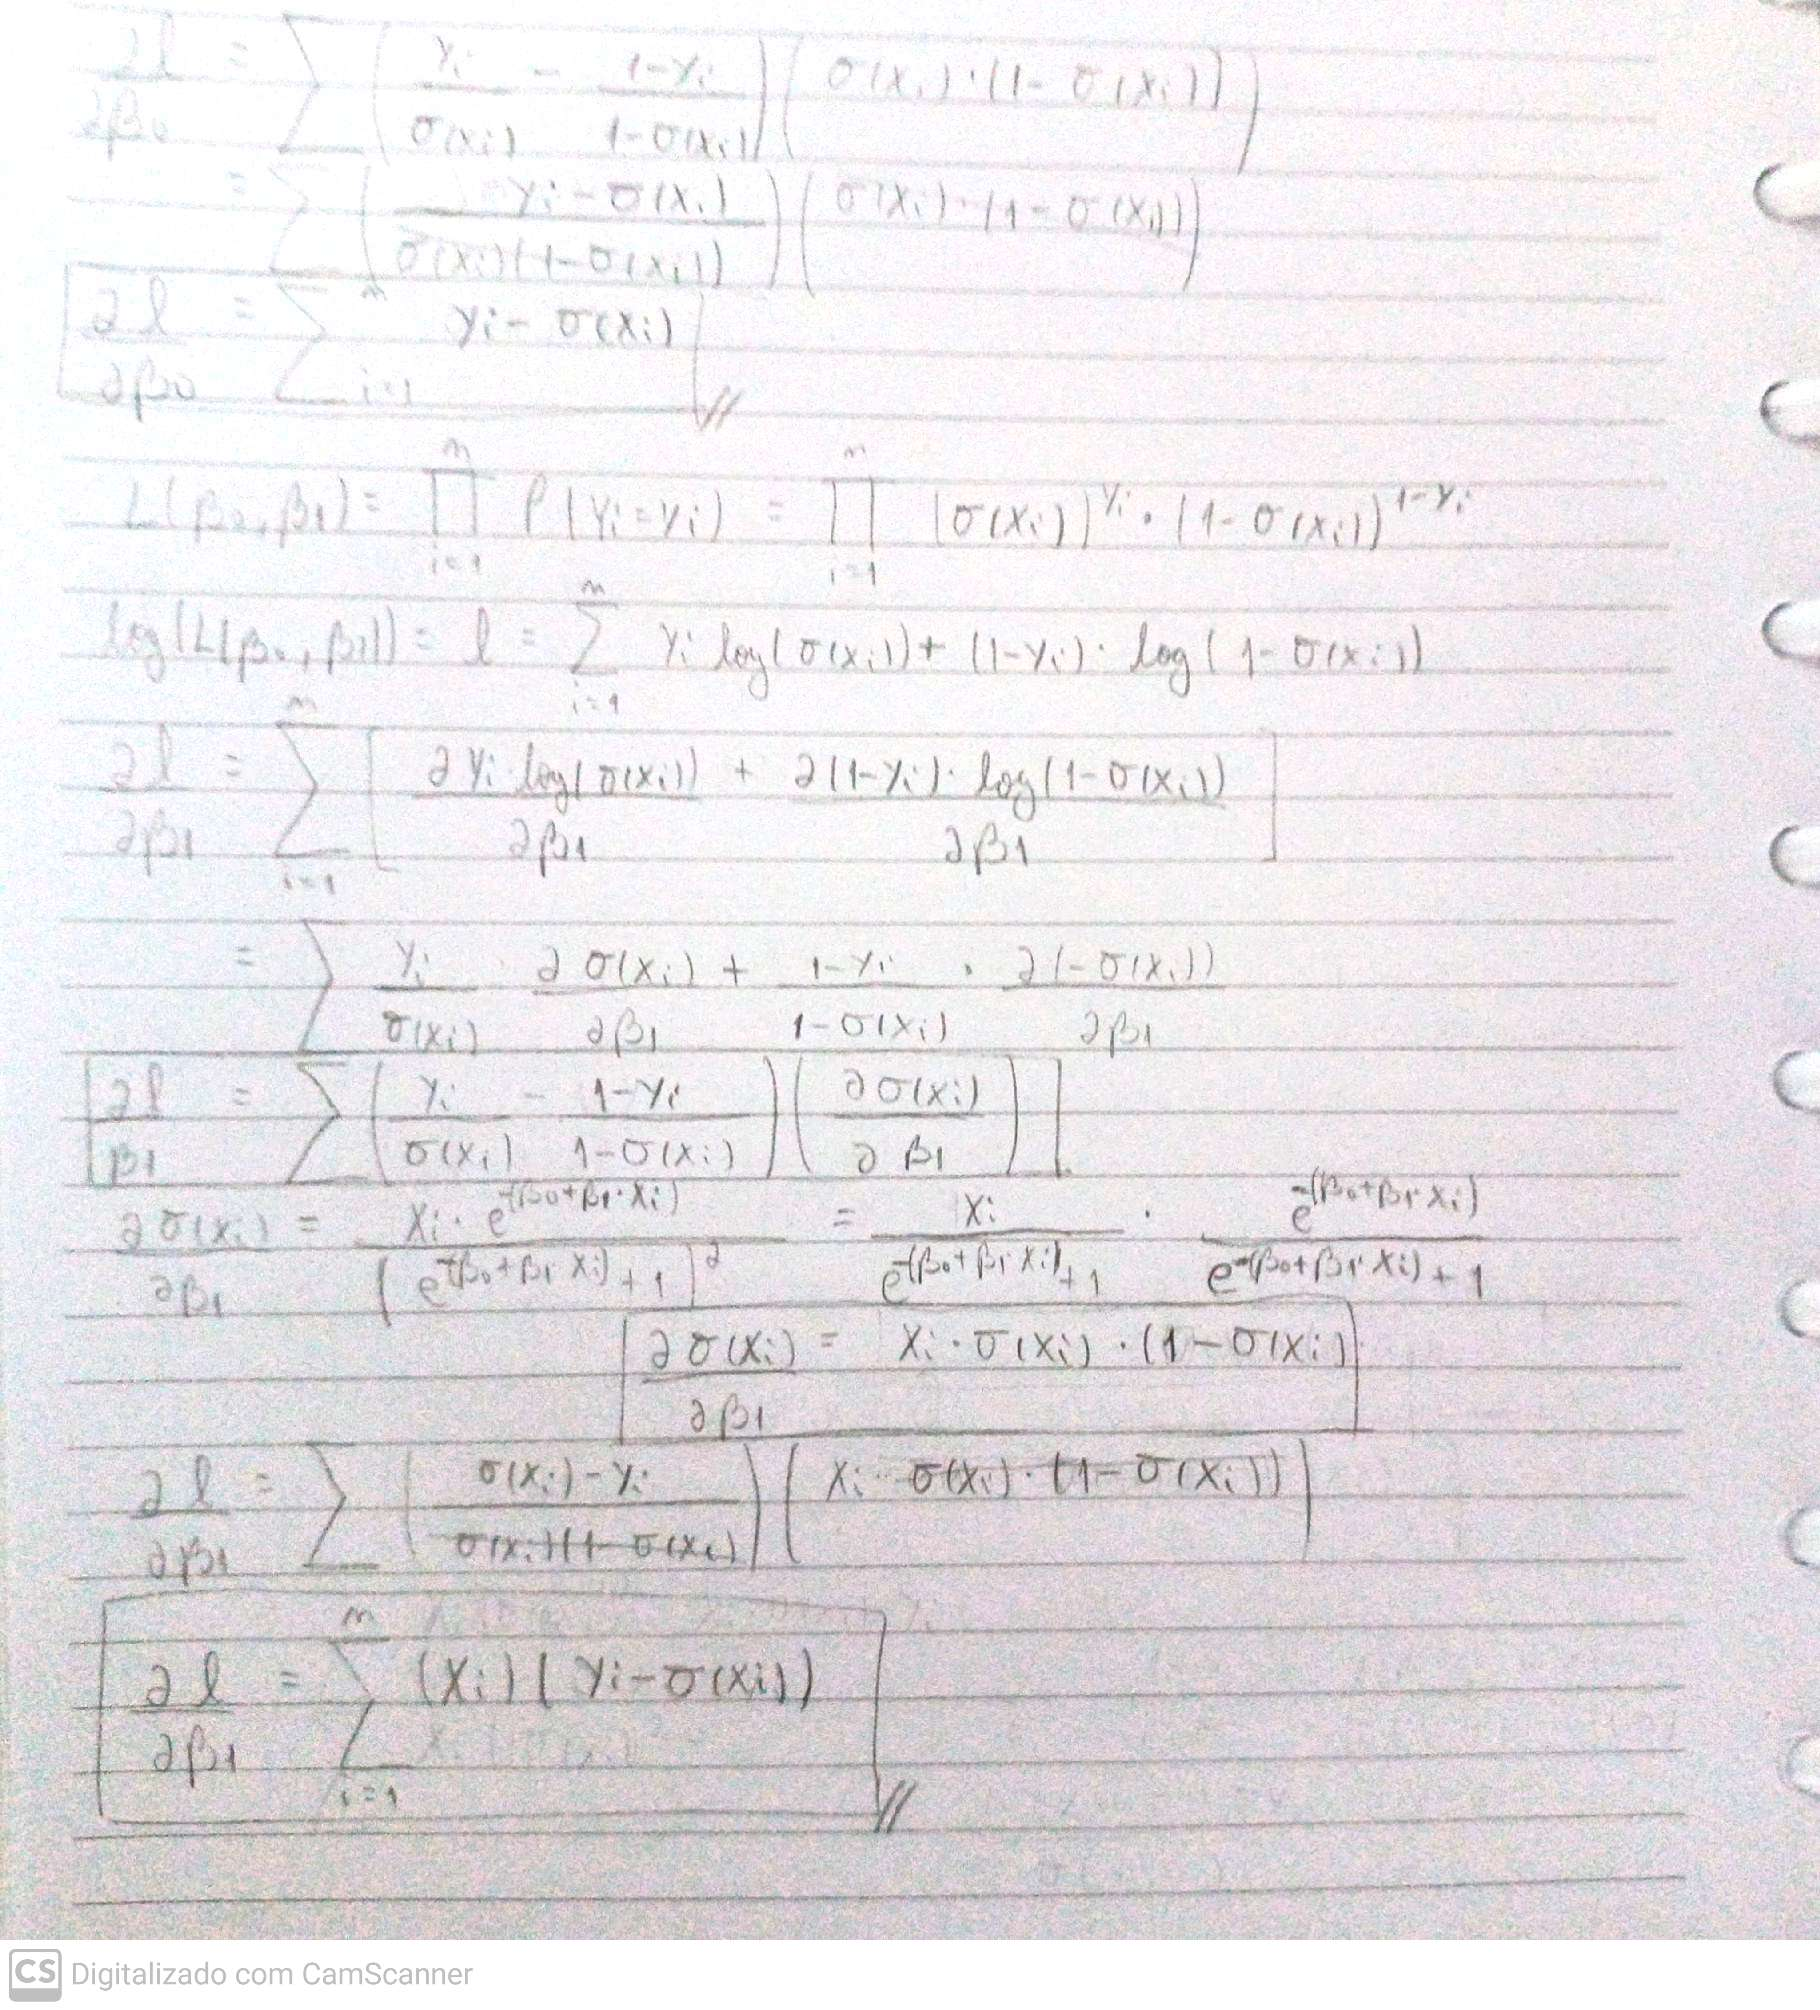

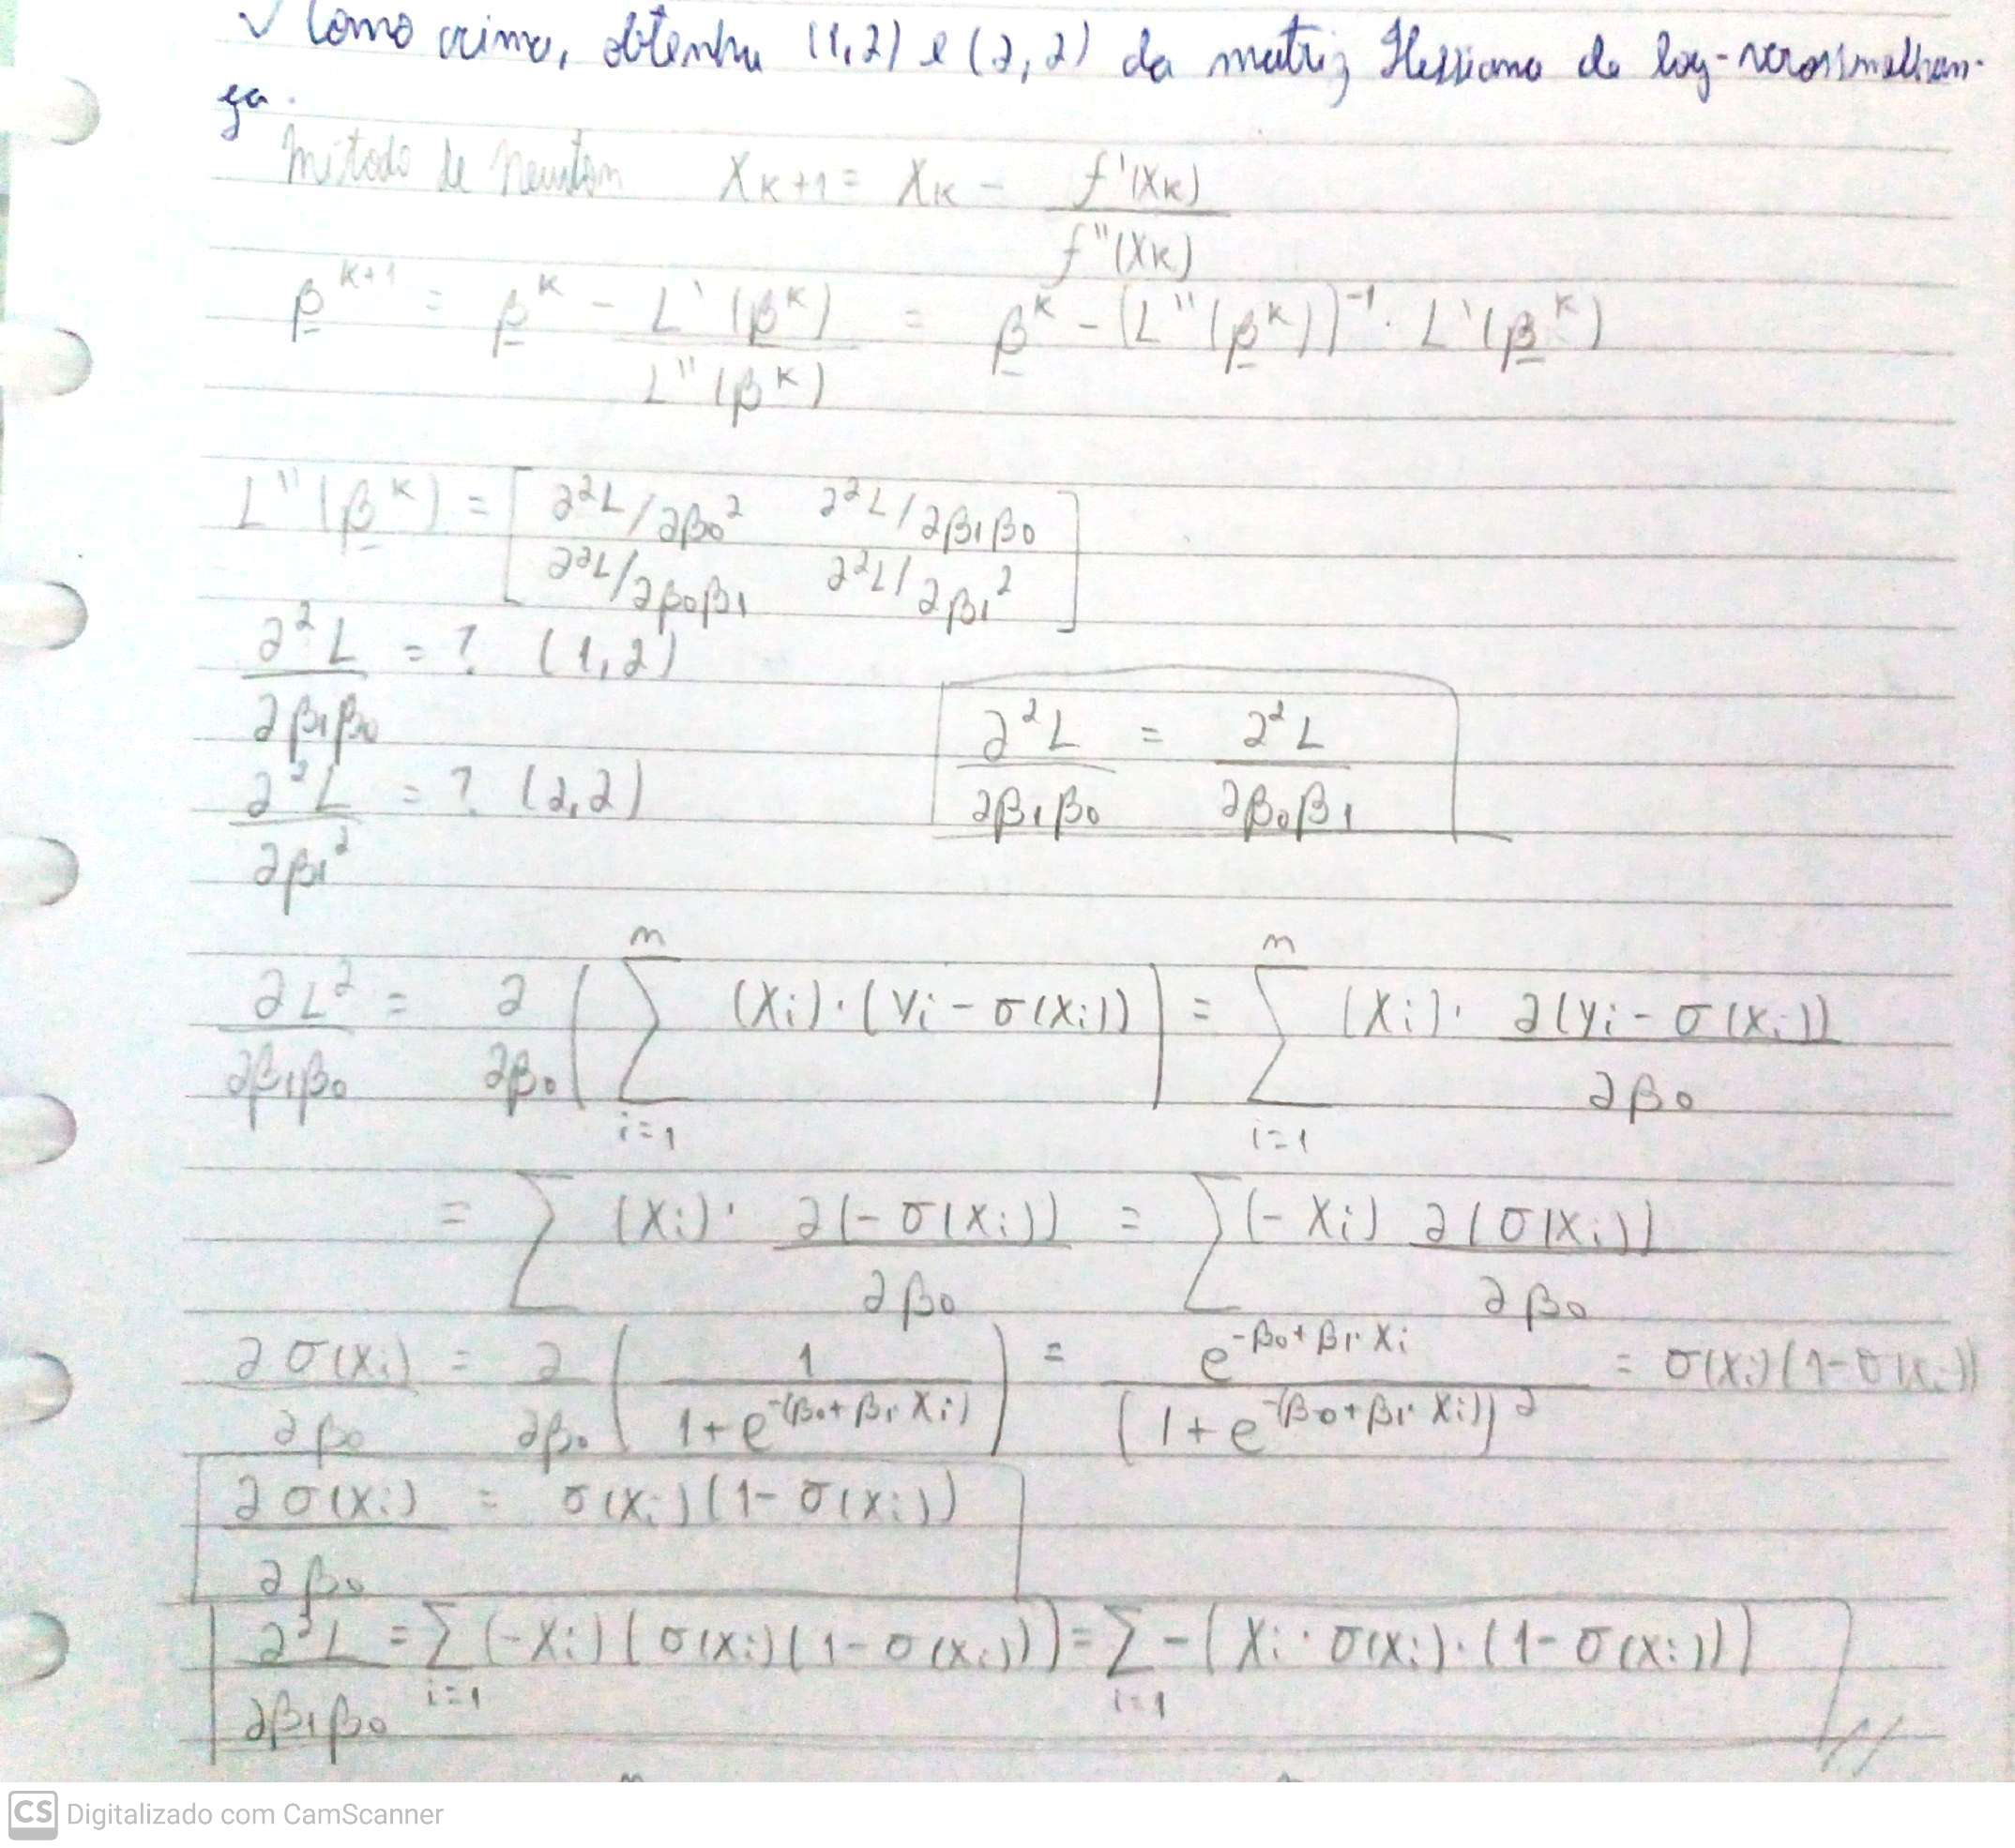

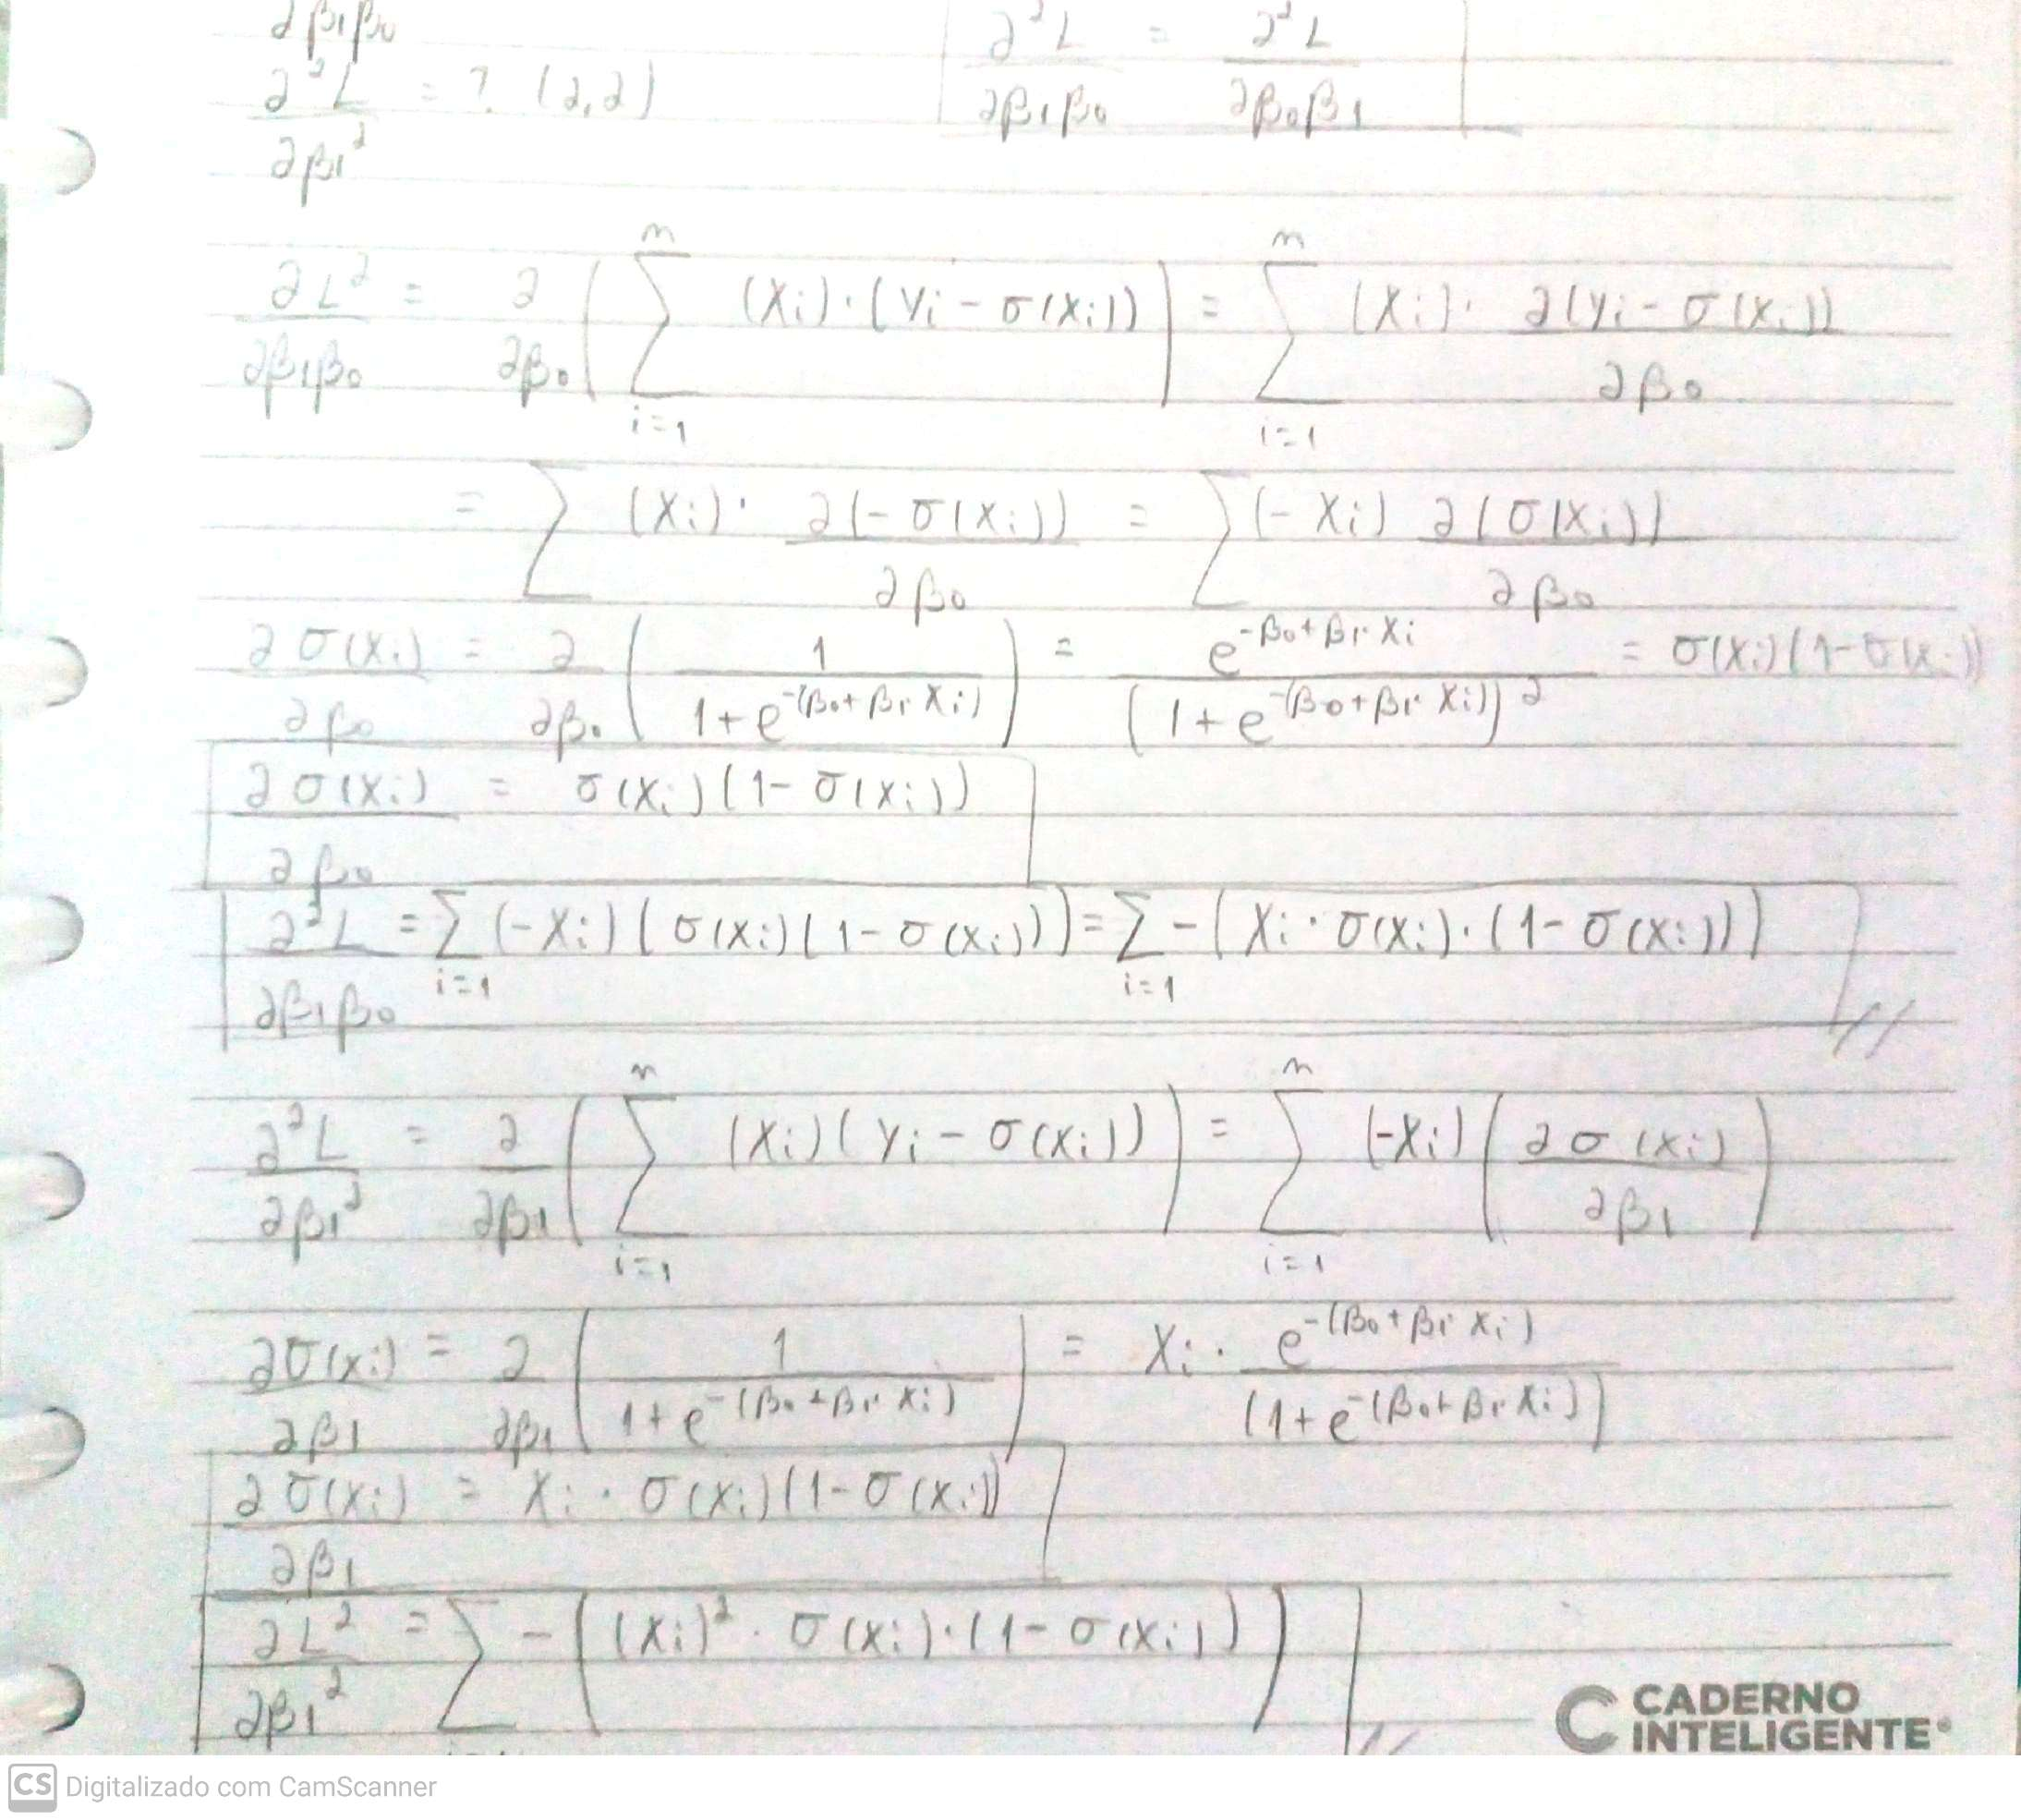

In [1]:
from dataclasses import dataclass
from tqdm import tqdm
import numpy as np


@dataclass
class MLE:
    beta_matrix: np.ndarray
    num_iterations: int

    def get_sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def get_gradiant_matrix(self, x_matrix, y_label):
        z = x_matrix @ self.beta_matrix
        sigma = self.get_sigmoid(z)

        error = y_label.reshape((-1, 1)) - sigma
        grad_matrix = x_matrix.T @ error

        return grad_matrix

    def get_hessian_matrix(self, x_feature):
        z = self.beta_matrix[0] + self.beta_matrix[1] * x_feature
        sigma = self.get_sigmoid(z)
        s = sigma * (1 - sigma)

        dl2_dw02 = -np.sum(s)
        dl2_dw0w1 = -np.sum(s * x_feature)
        dl2_dw12 = -np.sum(s * (x_feature**2))

        H_matrix = np.array([[dl2_dw02, dl2_dw0w1], [dl2_dw0w1, dl2_dw12]])

        return H_matrix

    def update_features(self, x_matrix, y_label):
        grad_matrix = self.get_gradiant_matrix(x_matrix, y_label)
        H_matrix = np.linalg.inv(self.get_hessian_matrix(x_matrix[:, 1]))
        self.beta_matrix = self.beta_matrix - (H_matrix @ grad_matrix)

    def fit(self, x_feature: np.ndarray, y_label: np.ndarray):
        x_matrix = np.array([np.ones_like(x_feature), x_feature]).T
        for idx in tqdm(range(self.num_iterations)):
            self.update_features(x_matrix, y_label)

        self.beta_0 = self.beta_matrix[0]
        self.beta_1 = self.beta_matrix[1]
        print(f"Beta_0: {self.beta_0.item()}")
        print(f"Beta_1: {self.beta_1.item()}")


100%|██████████| 100/100 [00:00<00:00, 12498.30it/s]


Beta_0: -1.9411038786712604
Beta_1: 0.480083082619917


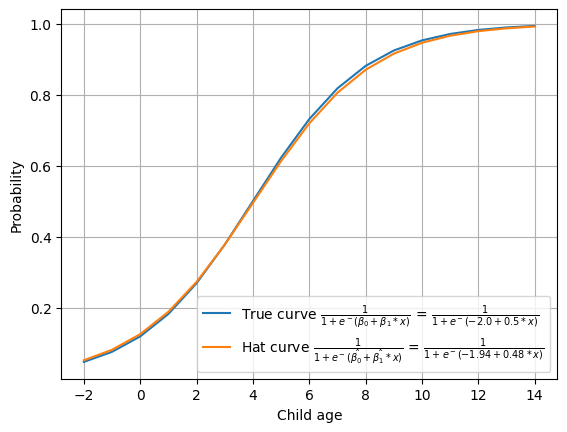

In [2]:
from listas.lista4.mle import MLE
import numpy as np
import matplotlib.pyplot as plt


if __name__ == "__main__":
    np.random.seed(42)

    size = 1000
    beta_0 = -2.0
    beta_1 = 0.5

    x = np.random.uniform(1, 12, size)

    sigma_true = 1 / (1 + np.exp(-(beta_0 + beta_1 * x)))
    y = np.random.binomial(1, sigma_true)

    init_beta_0 = 0
    init_beta_1 = 0
    beta_matrix = np.array([init_beta_0, init_beta_1]).reshape((2, 1))
    mlestimator = MLE(beta_matrix=beta_matrix, num_iterations=100)
    mlestimator.fit(x, y)

    x_axis = np.arange(-2, 15)
    y_true = 1 / (1 + np.exp(-(beta_0 + beta_1 * x_axis)))
    y_hat = 1 / (1 + np.exp(-(mlestimator.beta_matrix[0].item() + mlestimator.beta_matrix[1].item() * x_axis)))
    plt.figure()
    plt.plot(x_axis, y_true)
    plt.plot(x_axis, y_hat)
    plt.legend(
        [
            r"True curve $\frac{1}{1 + e^-(\beta_0 + \beta_1 * x)}$ = $\frac{1}{1 + e^-(-2.0 + 0.5 * x)}$",
            r"Hat curve $\frac{1}{1 + e^-(\hat{\beta_0} + \hat{\beta_1} * x)}$ = $\frac{1}{1 + e^-(-1.94 + 0.48 * x)}$",
        ]
    )
    plt.xlabel("Child age")
    plt.ylabel("Probability")
    plt.grid()
    plt.show()


# Questão 3

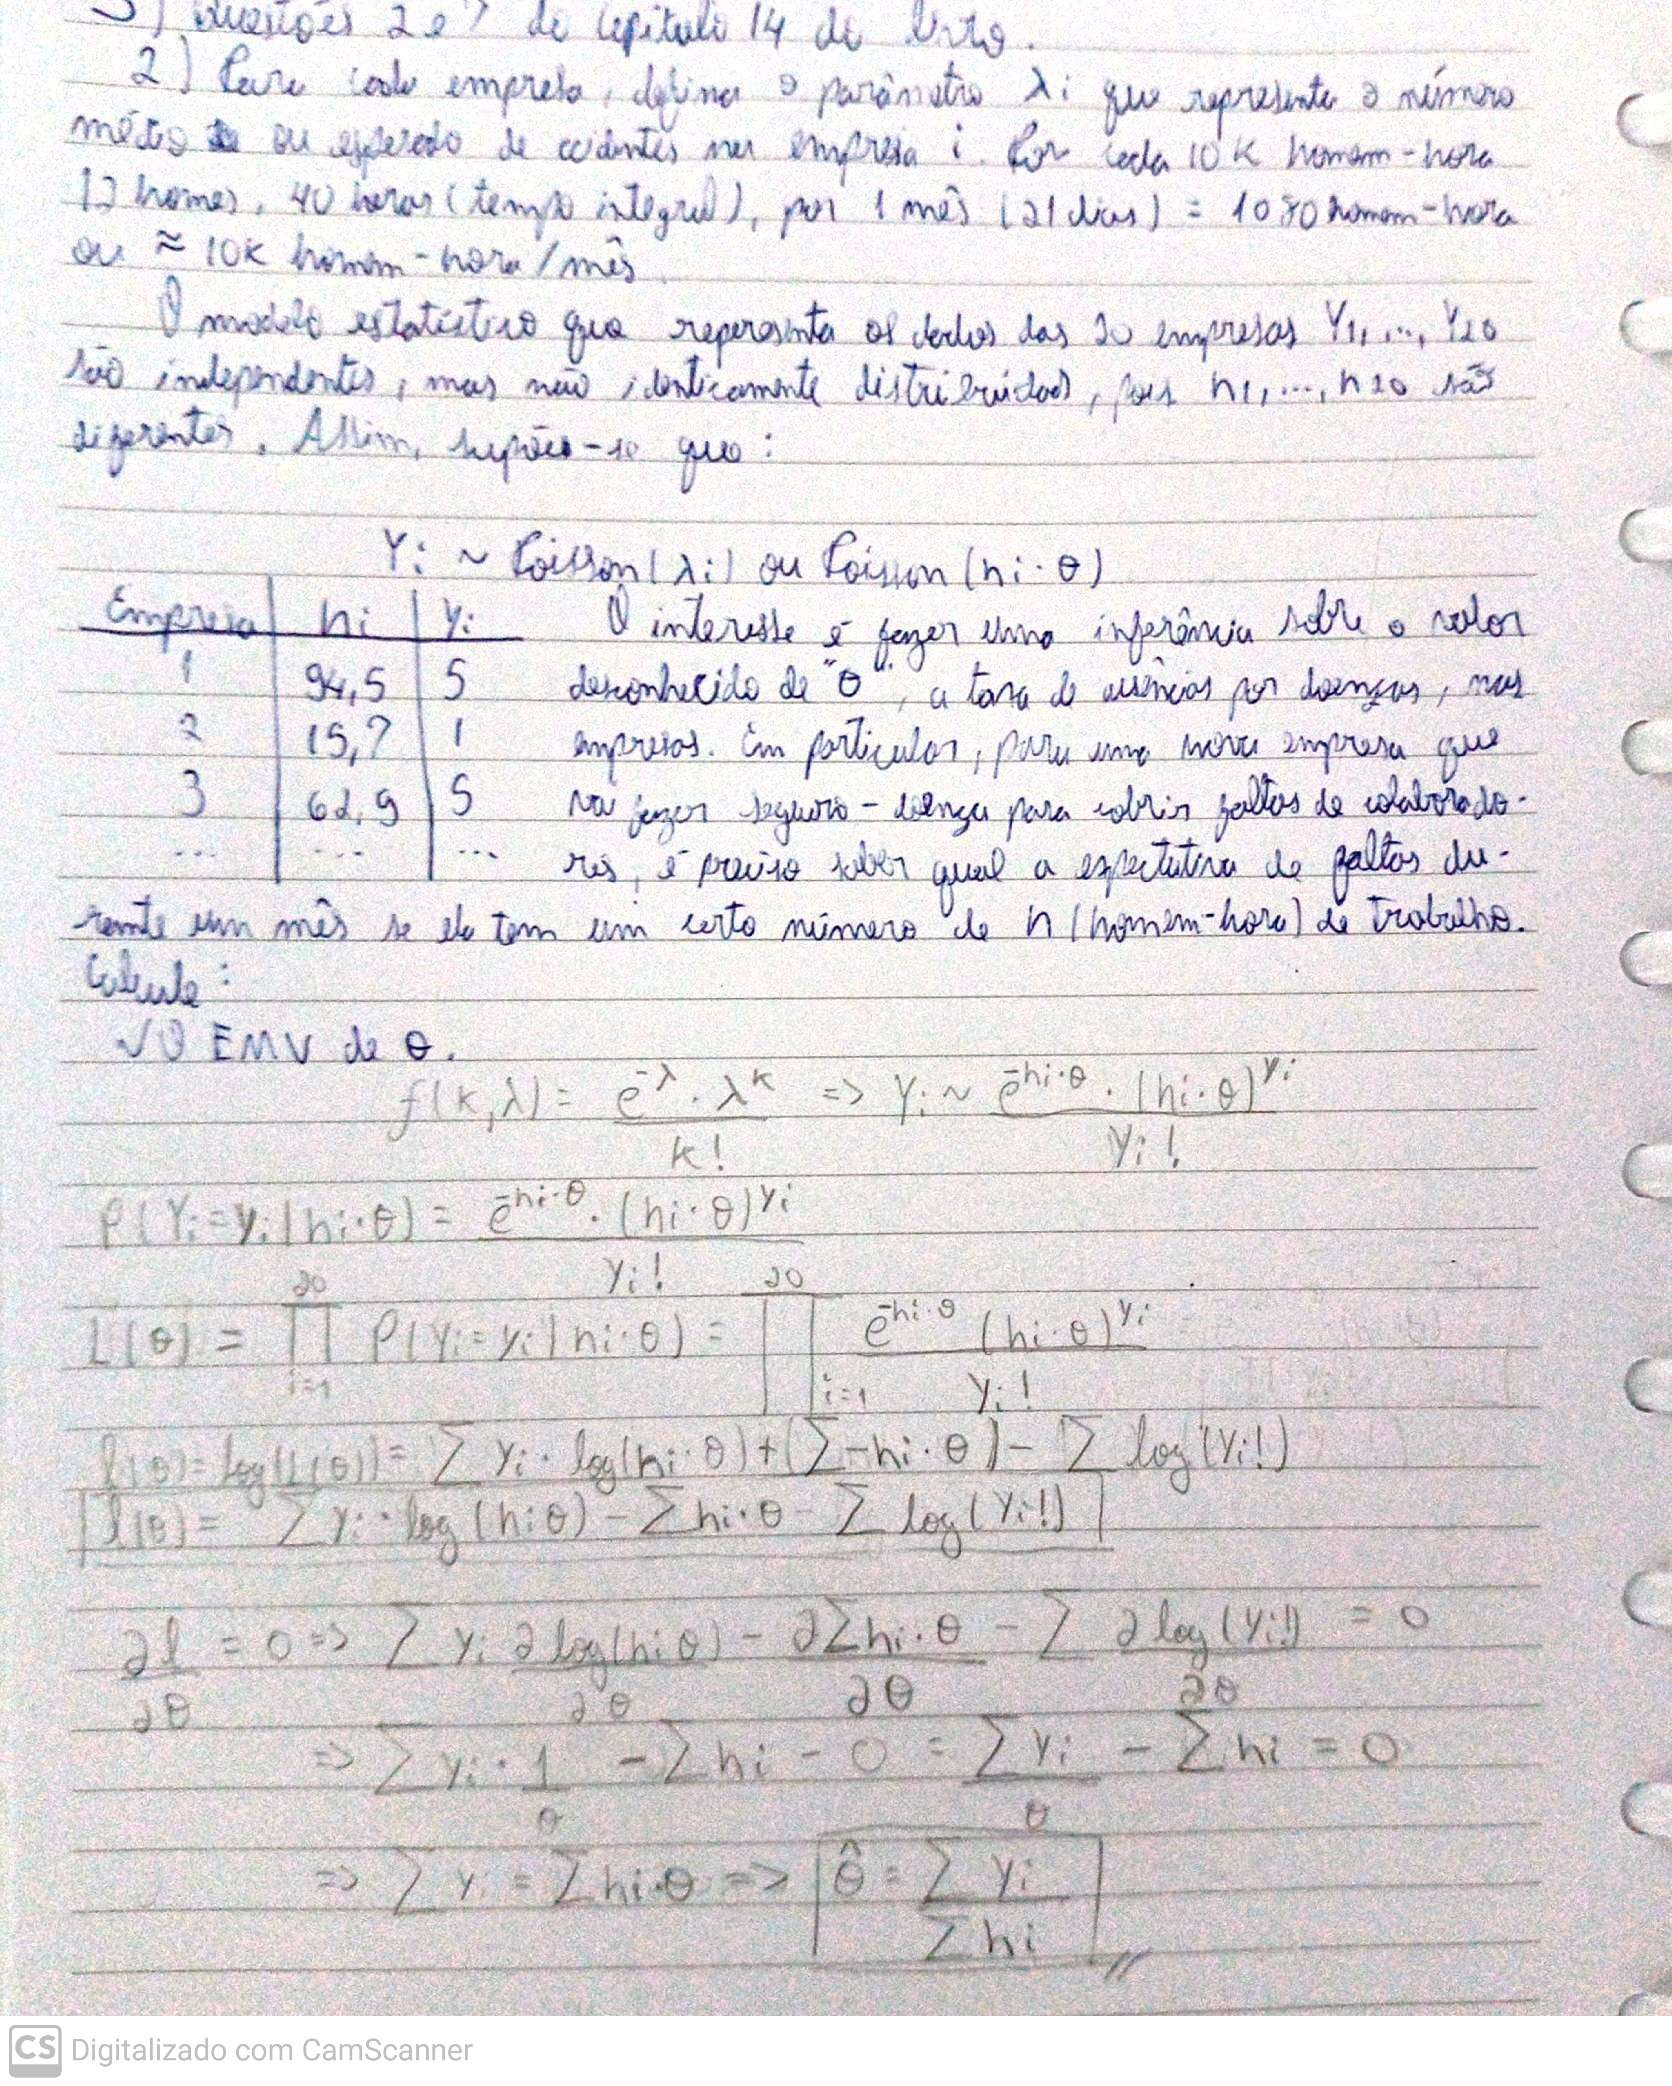

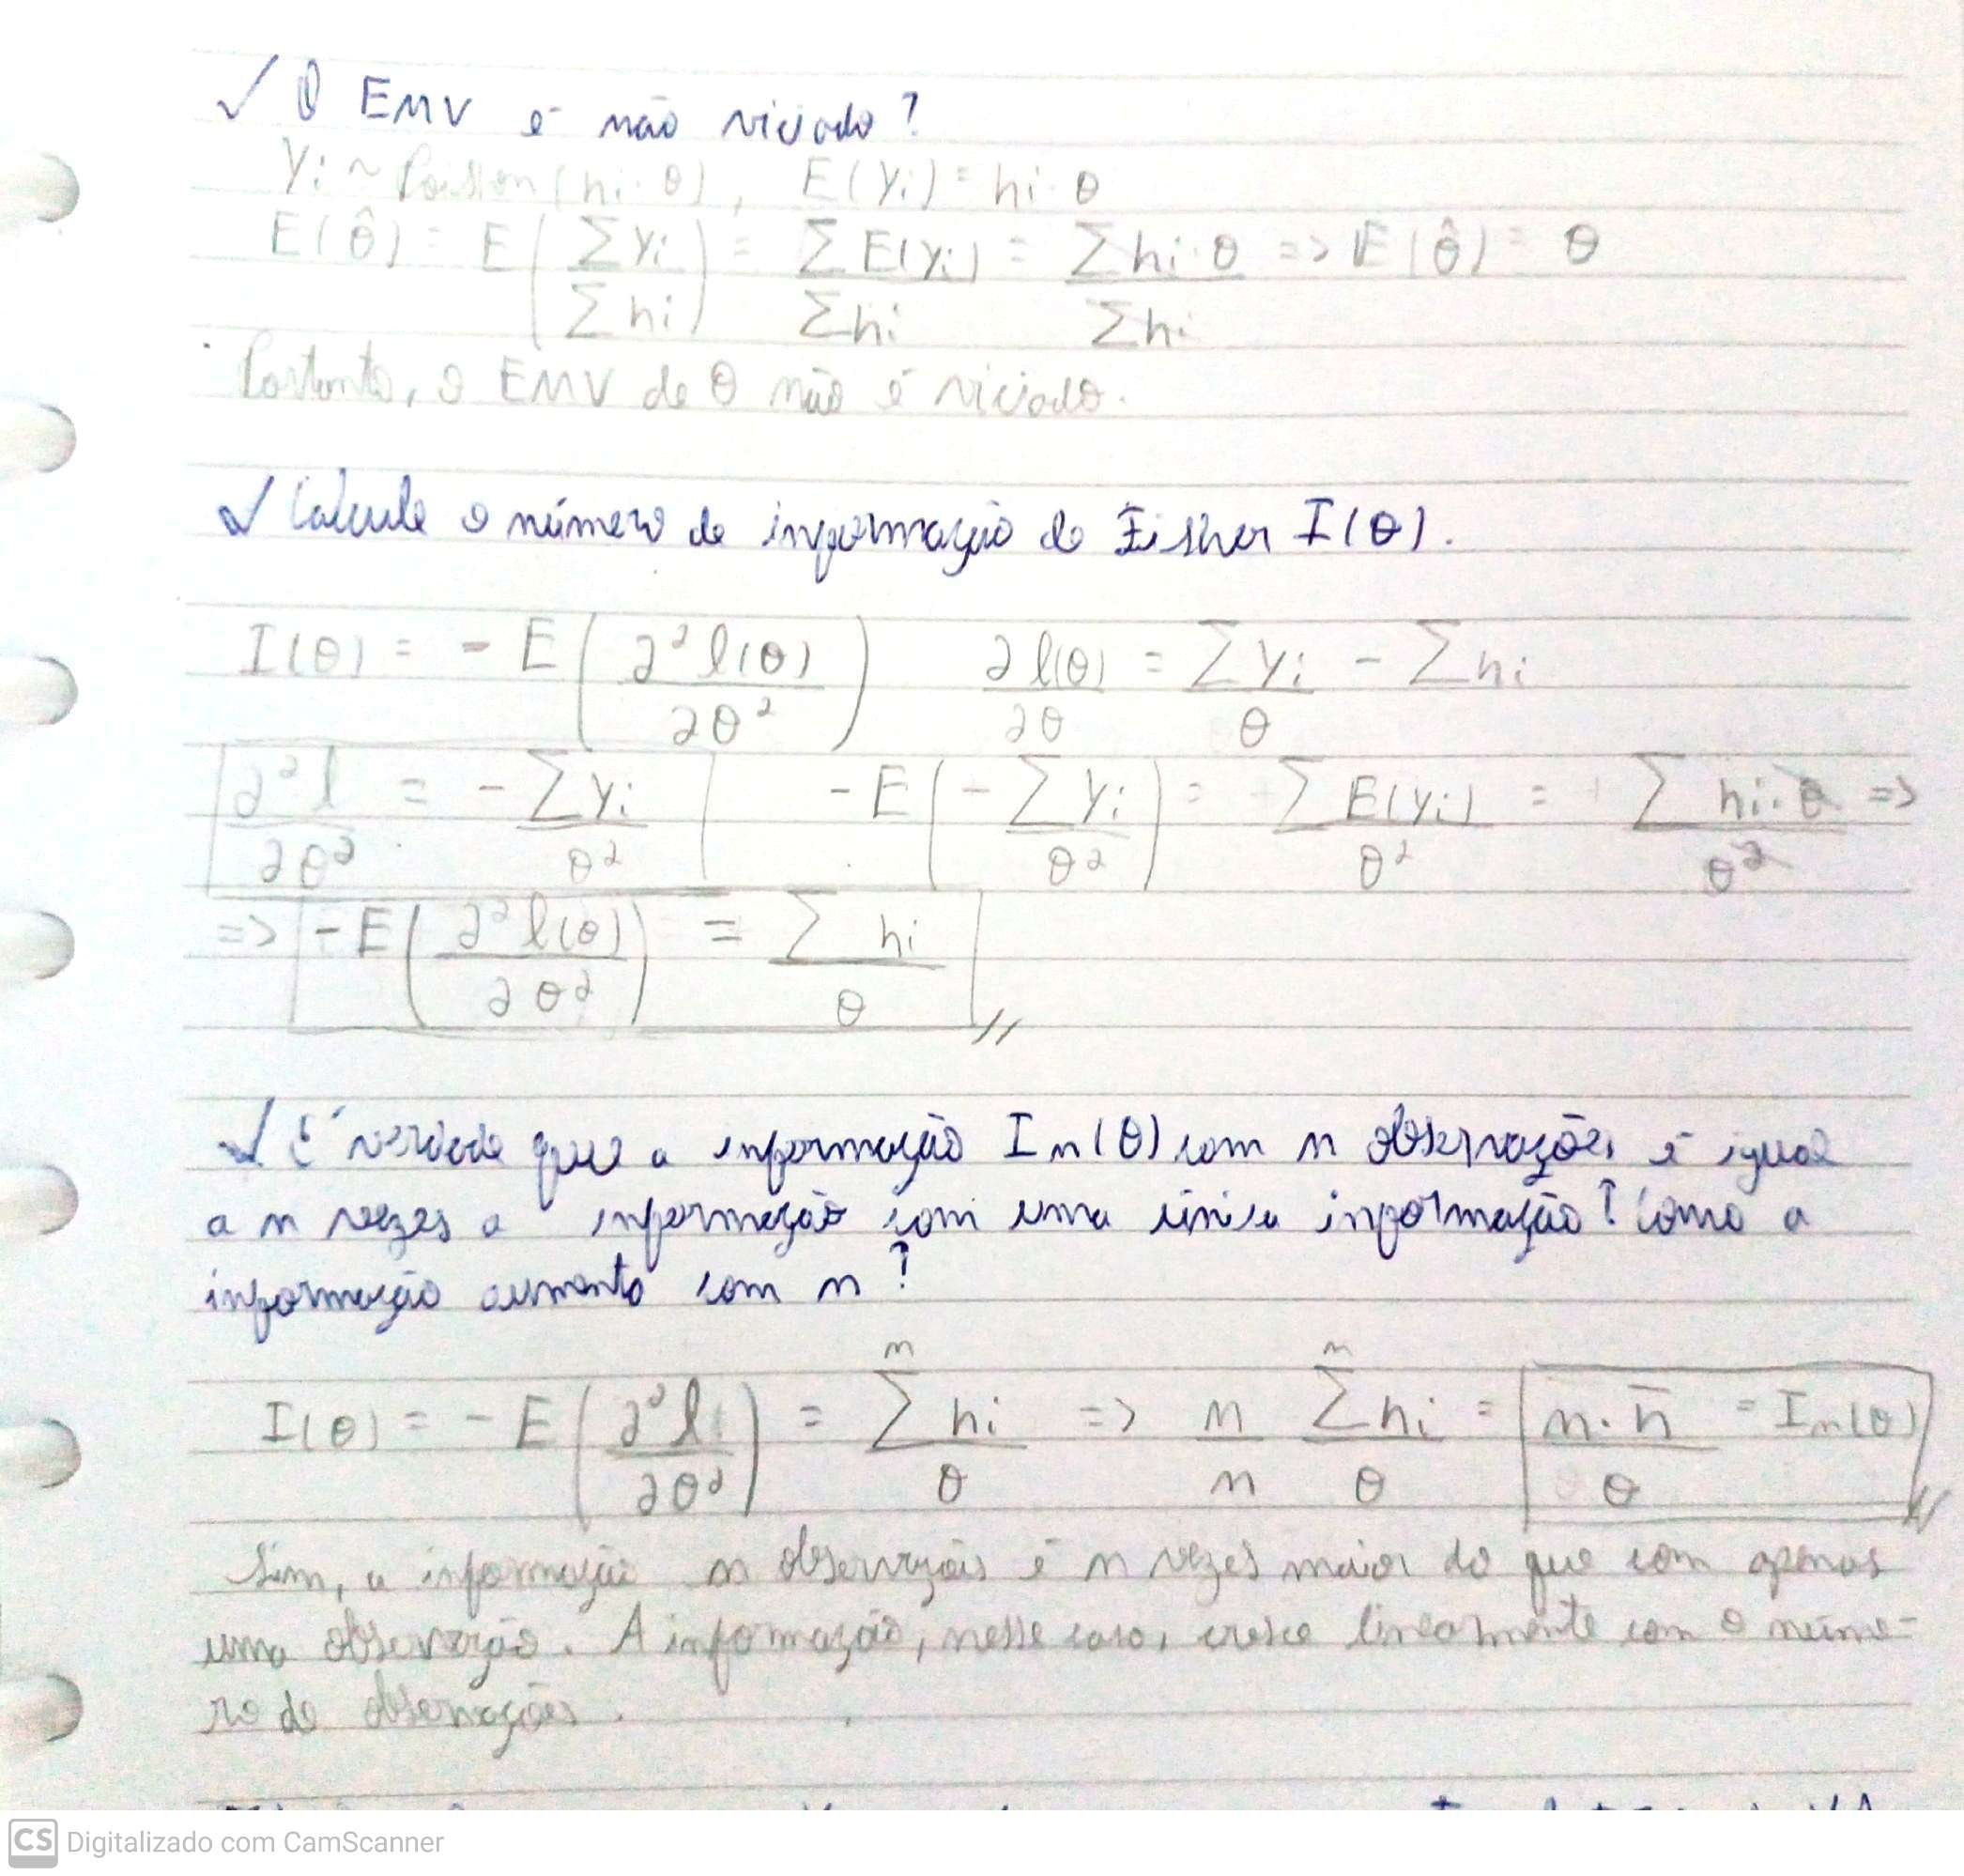

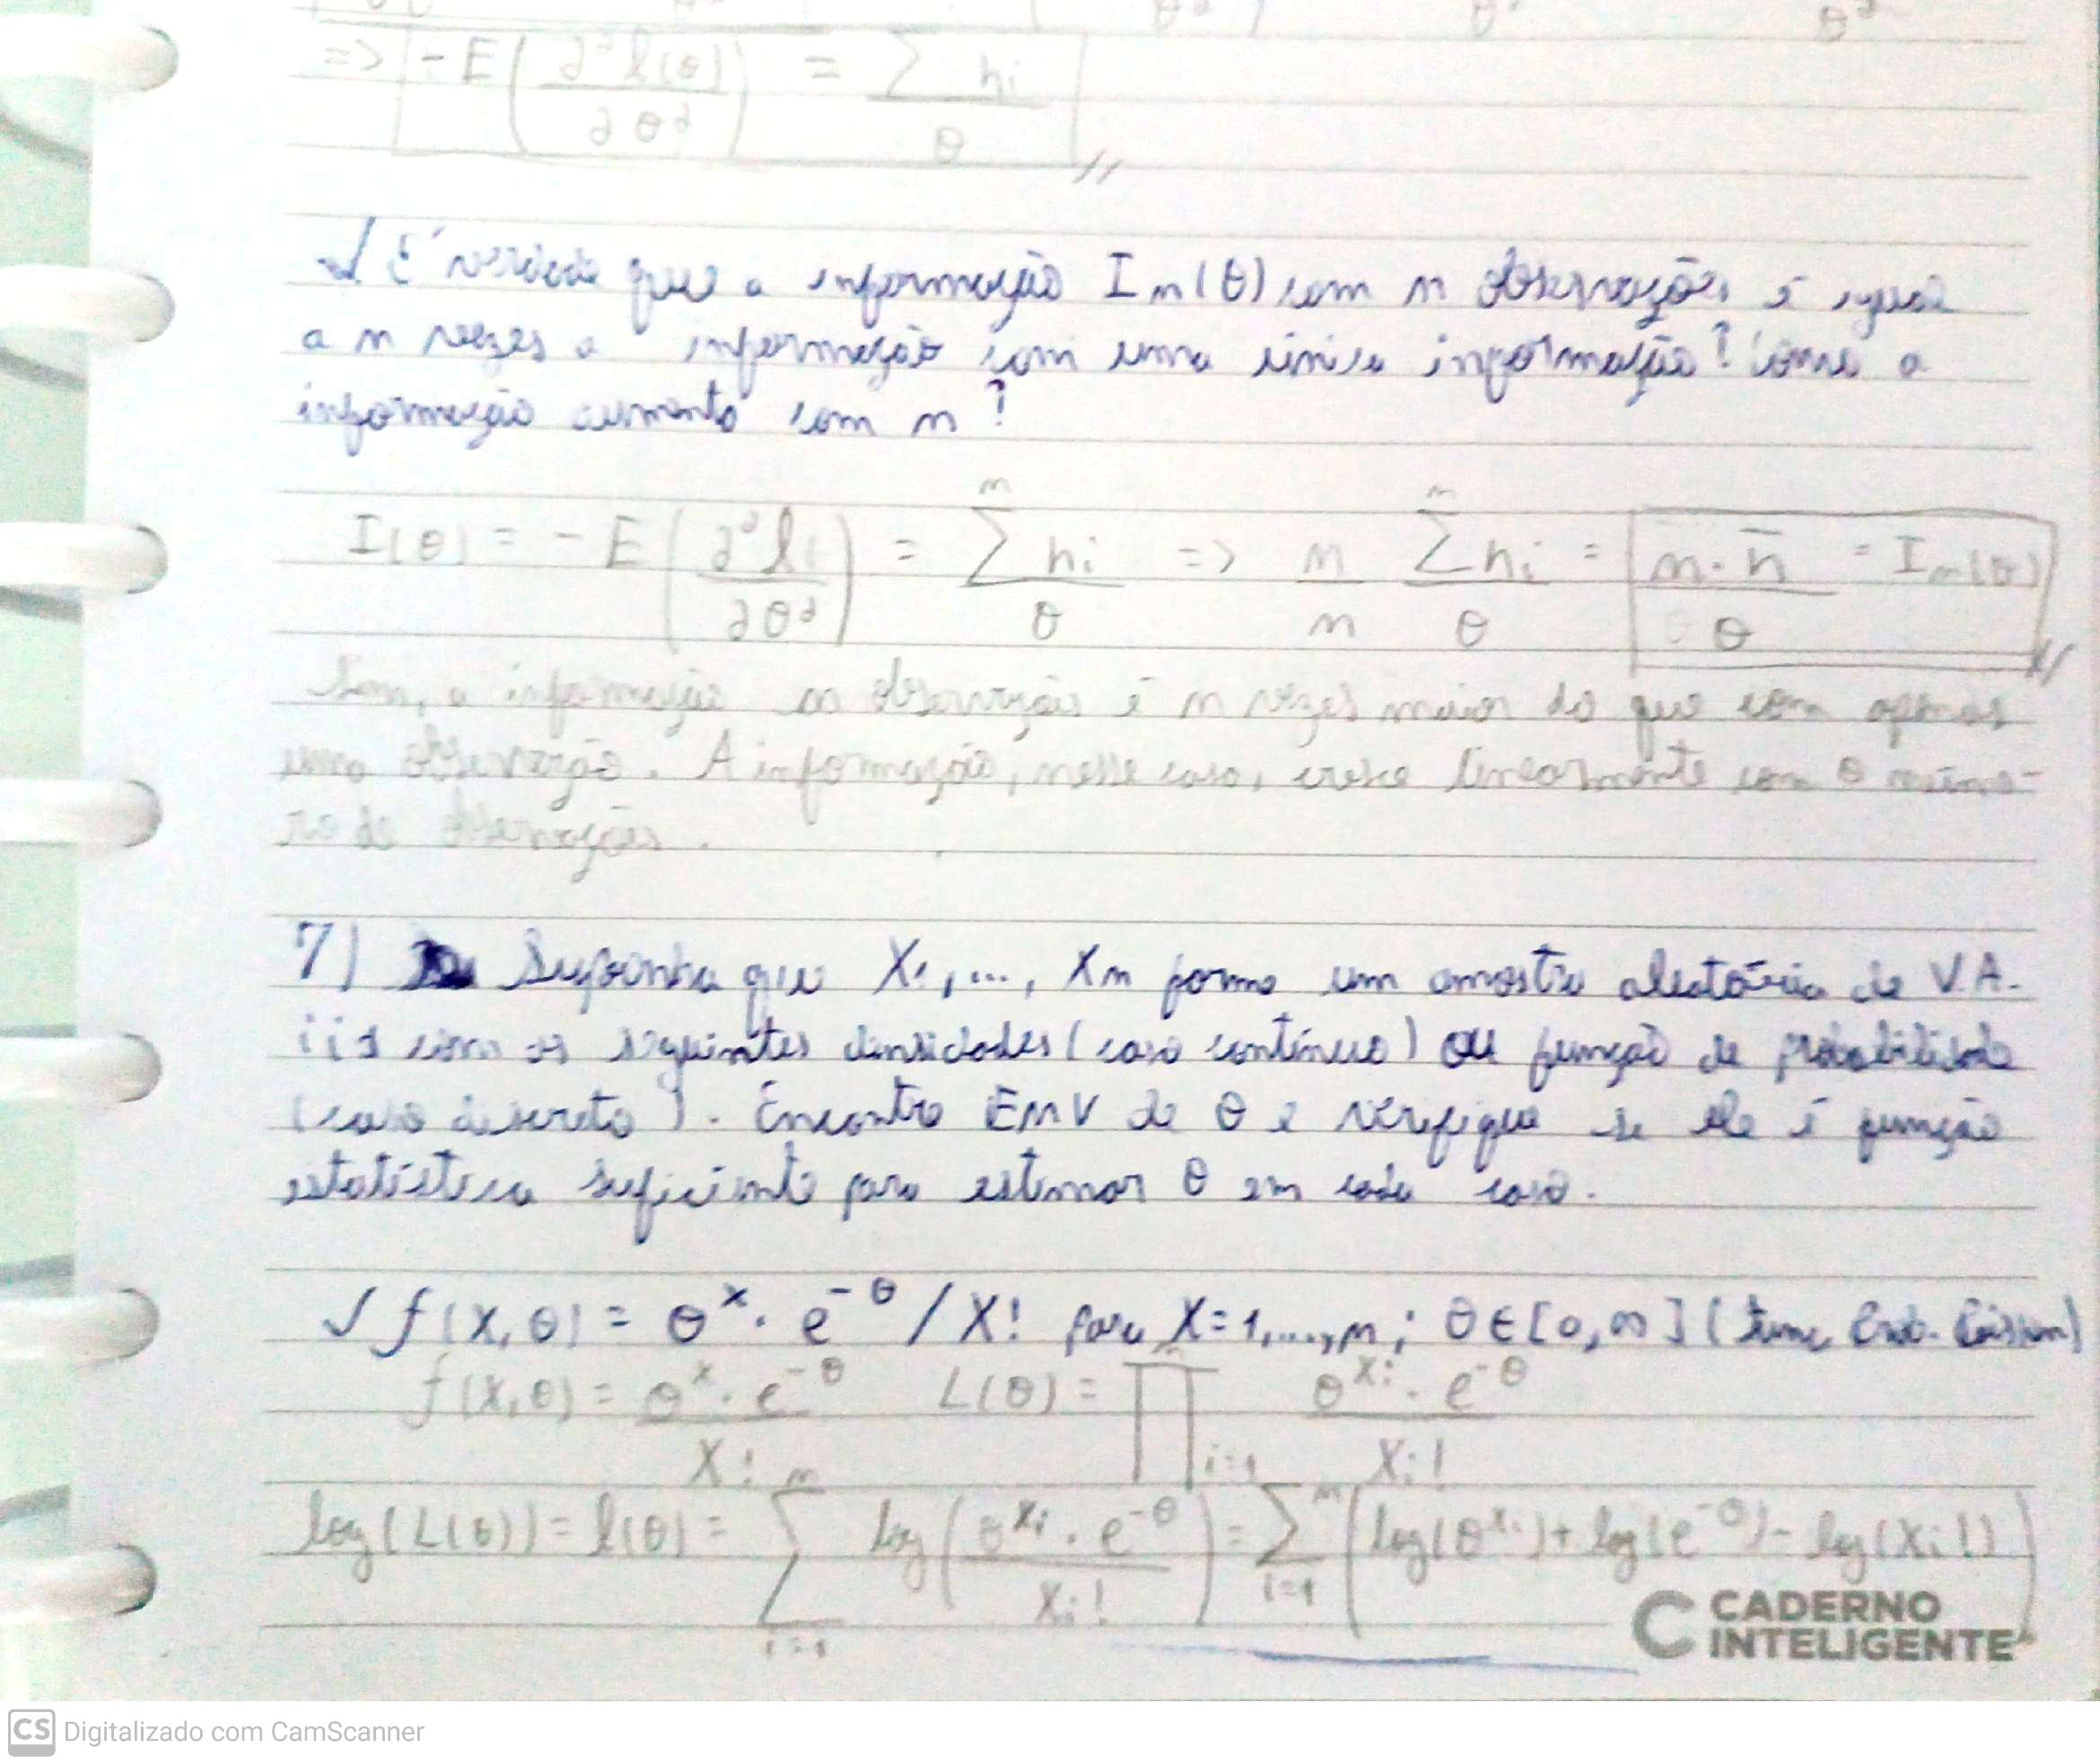

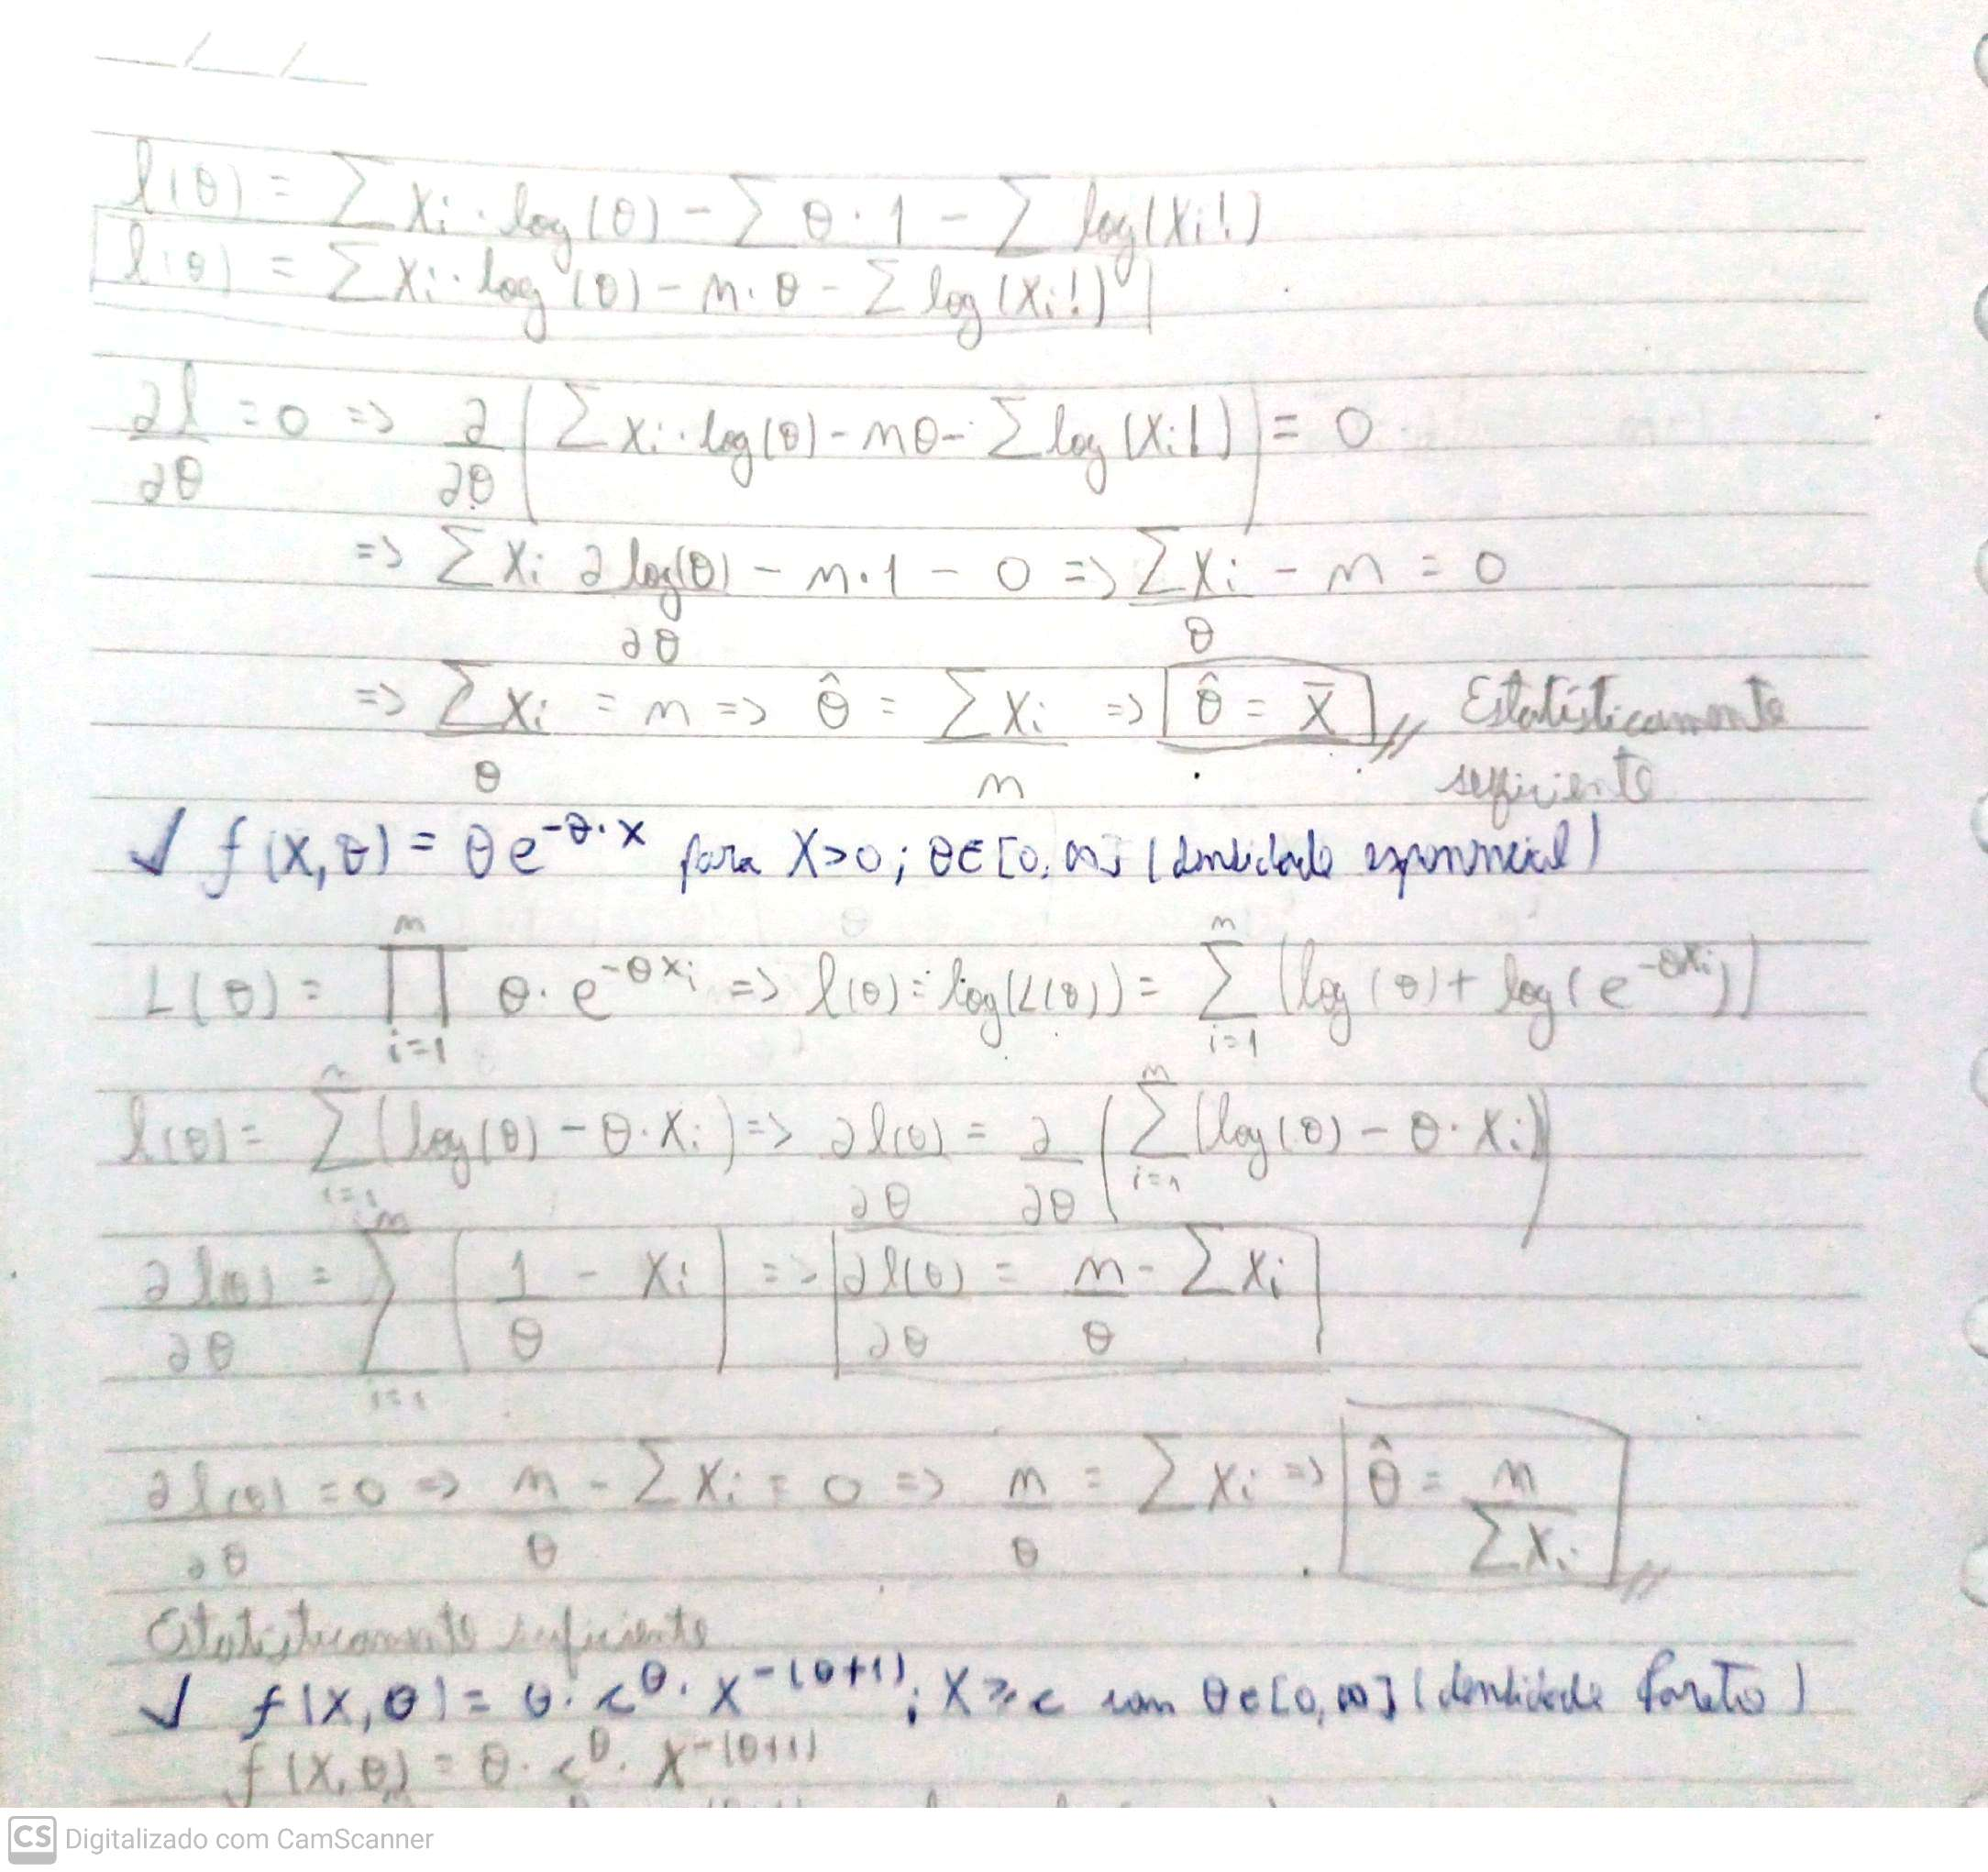

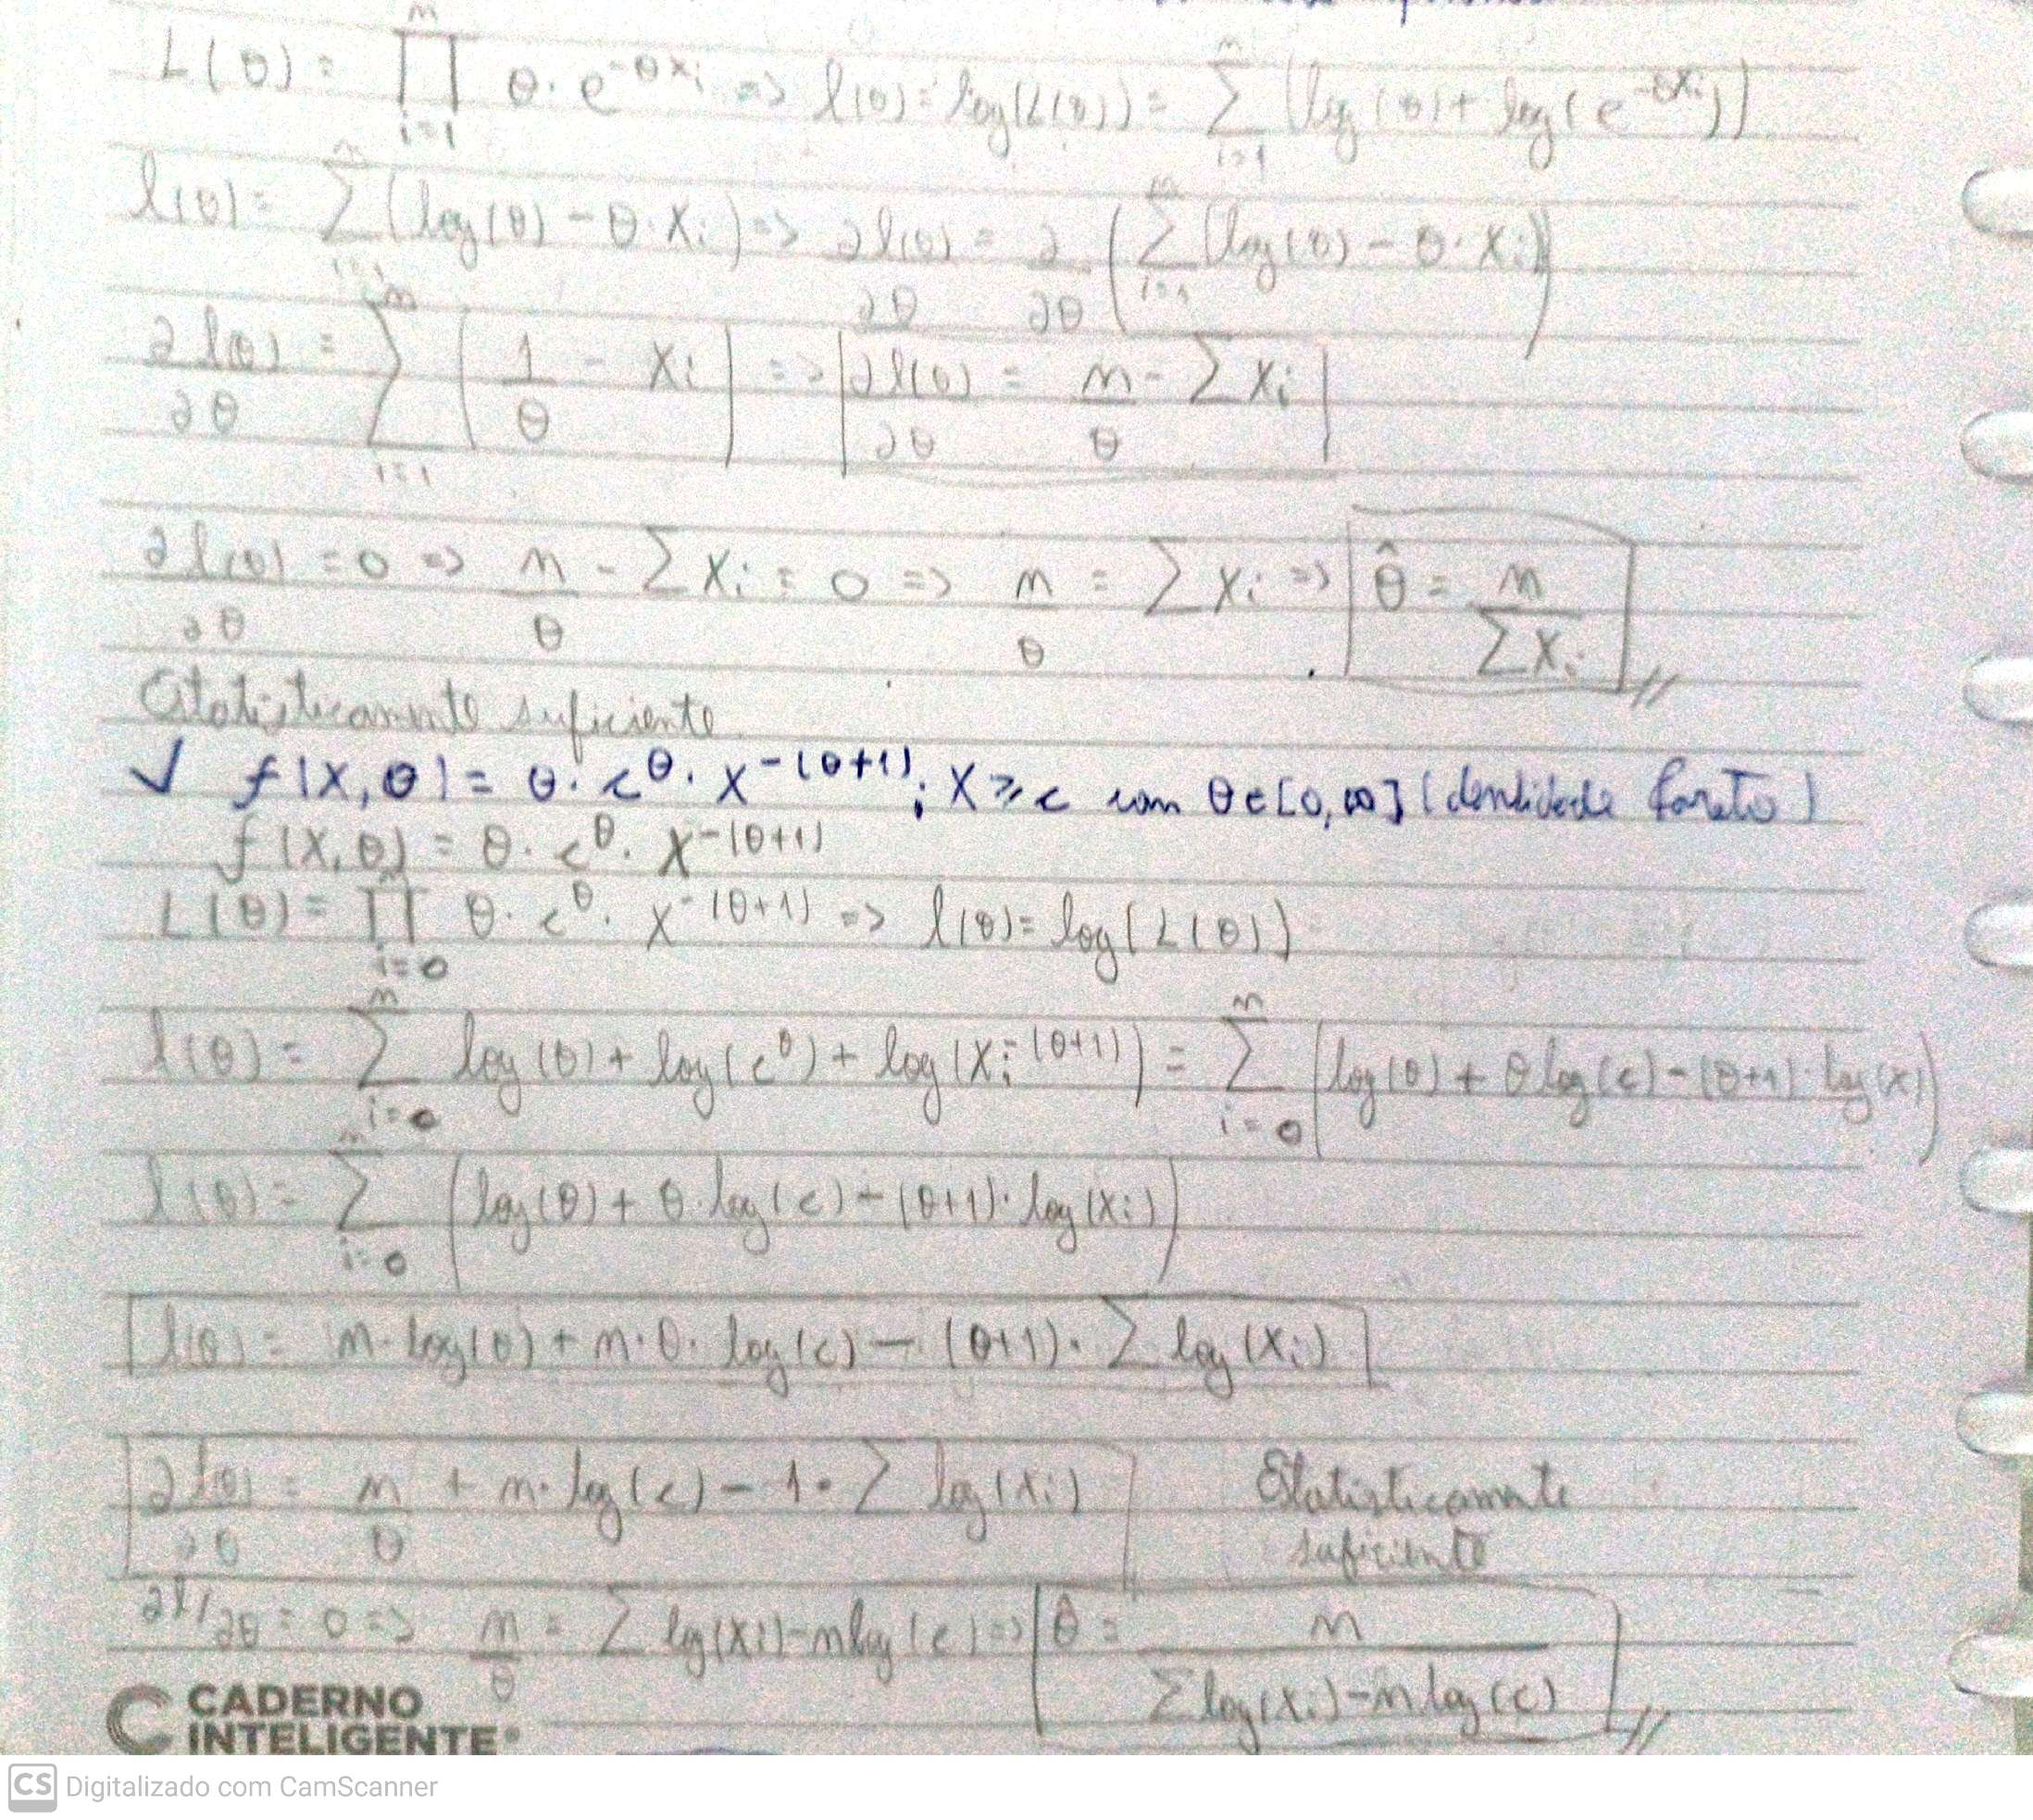

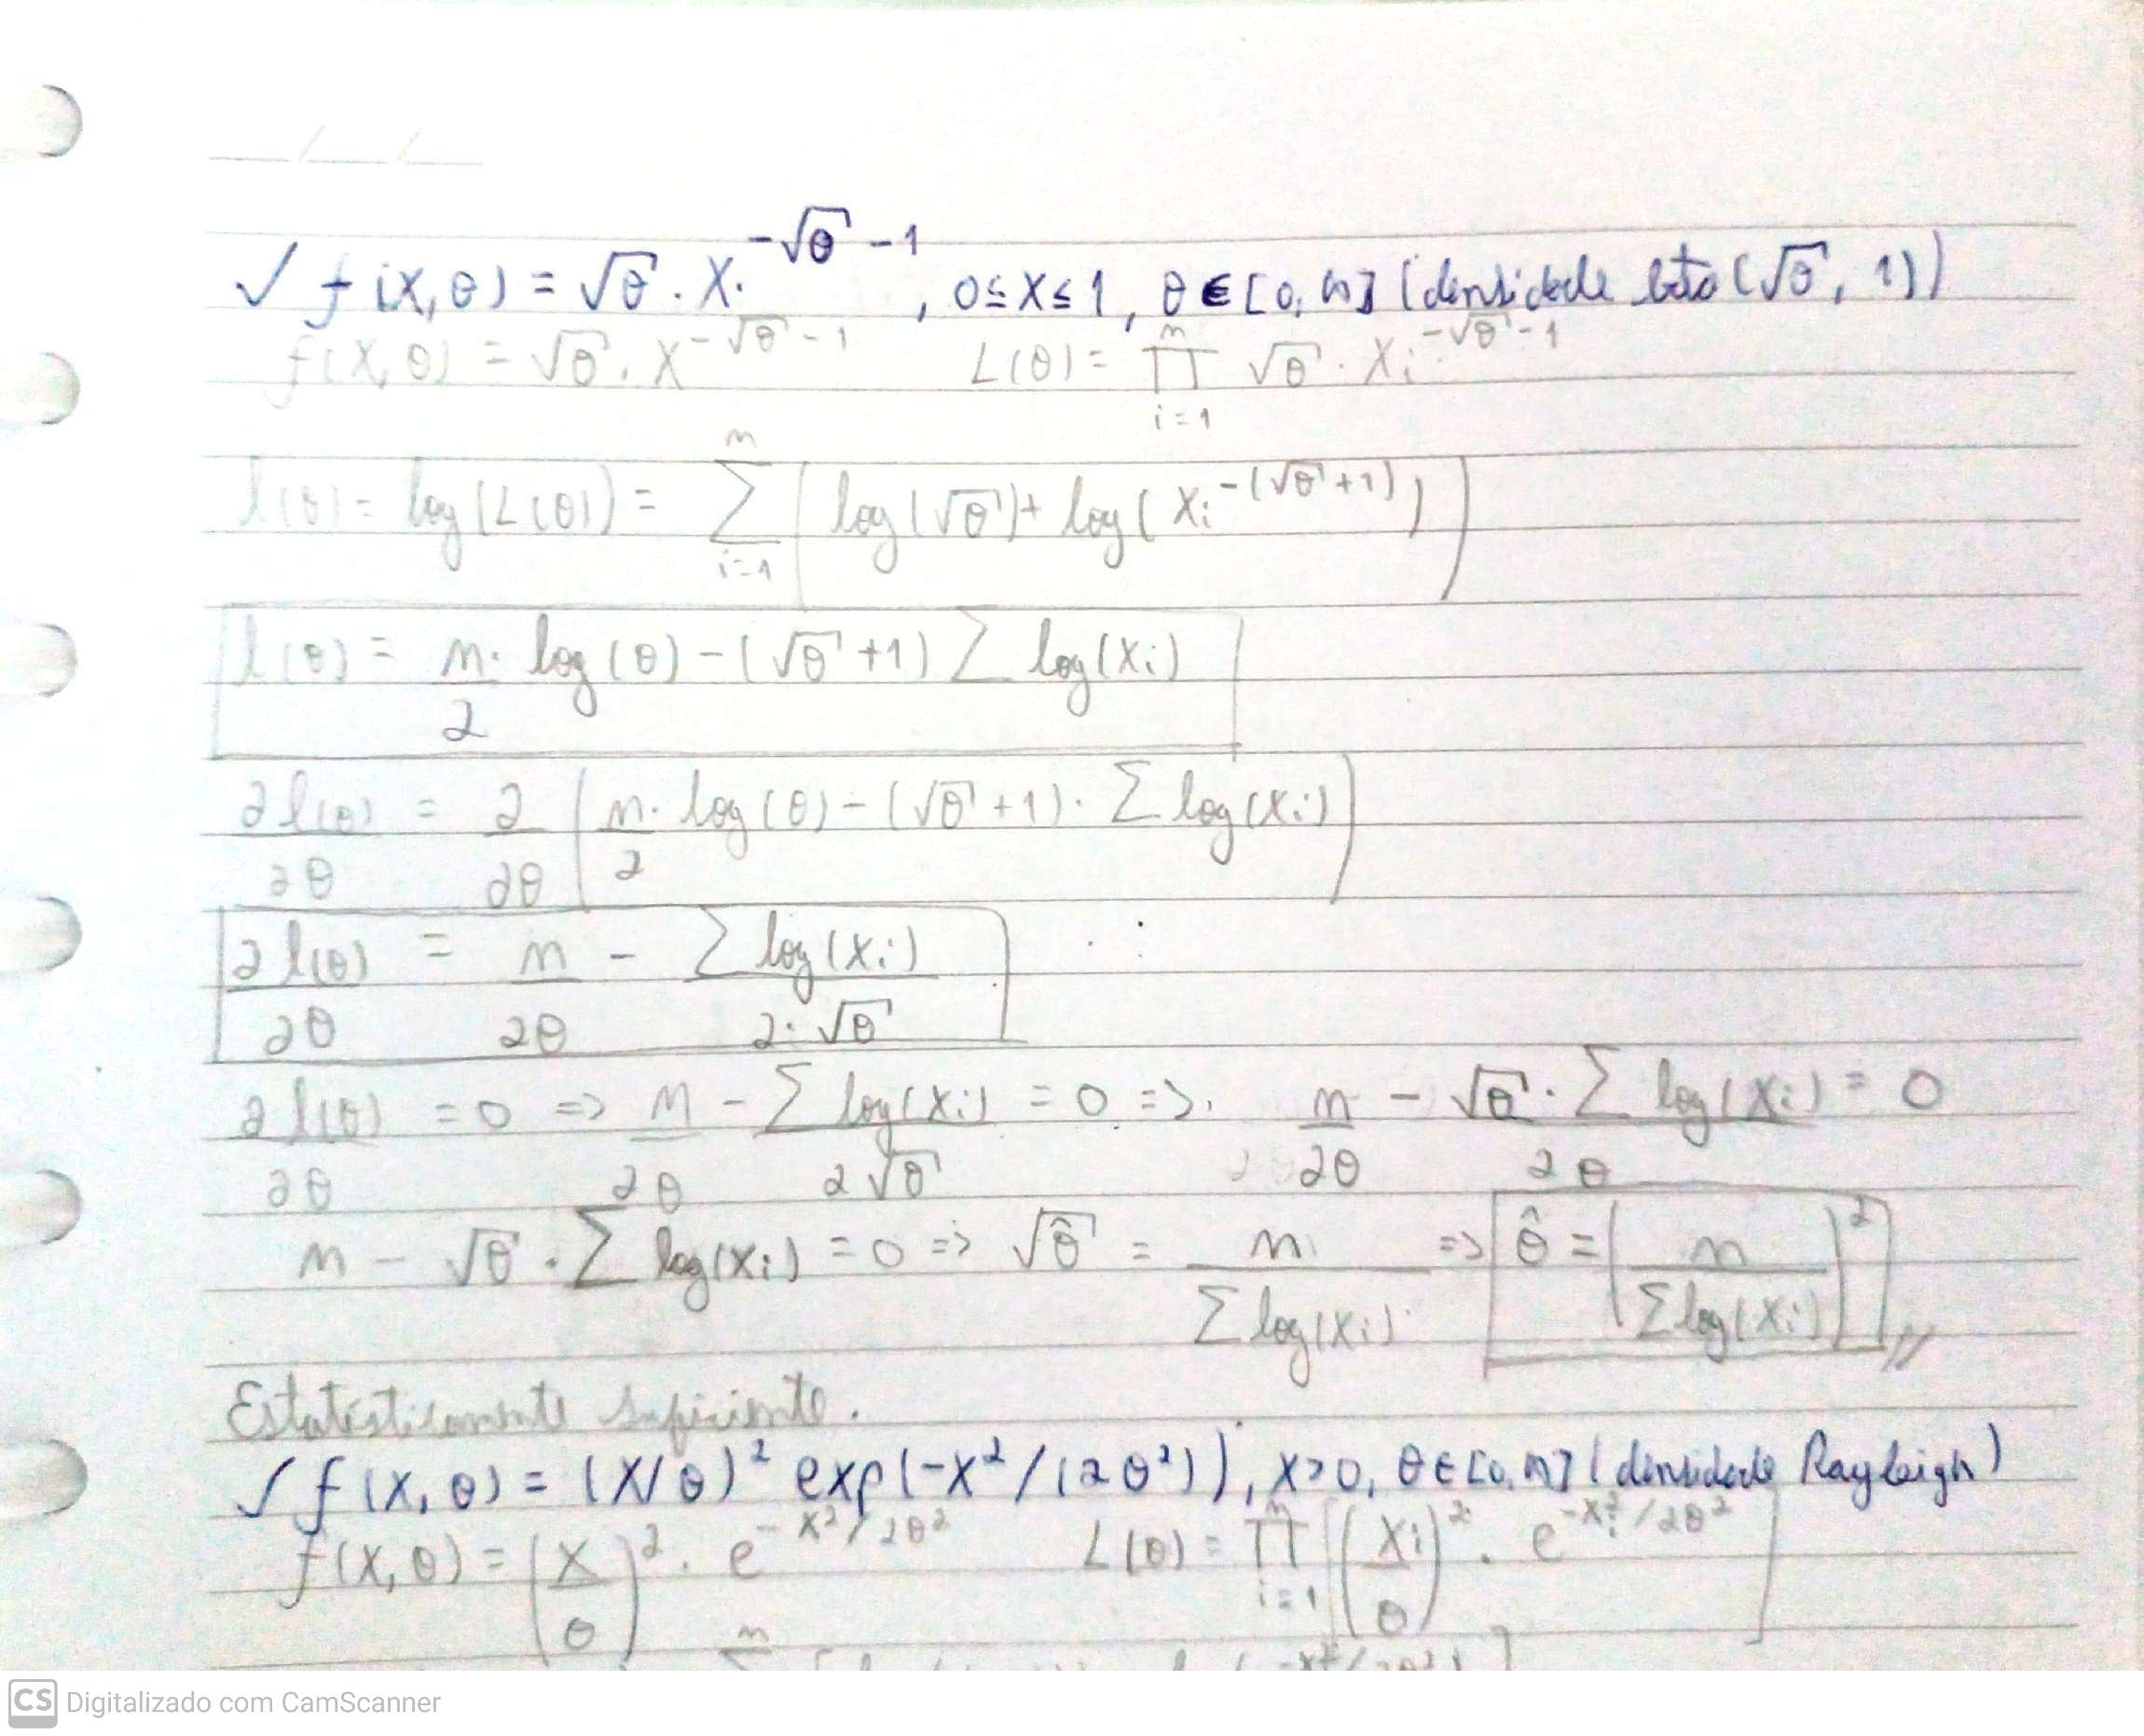

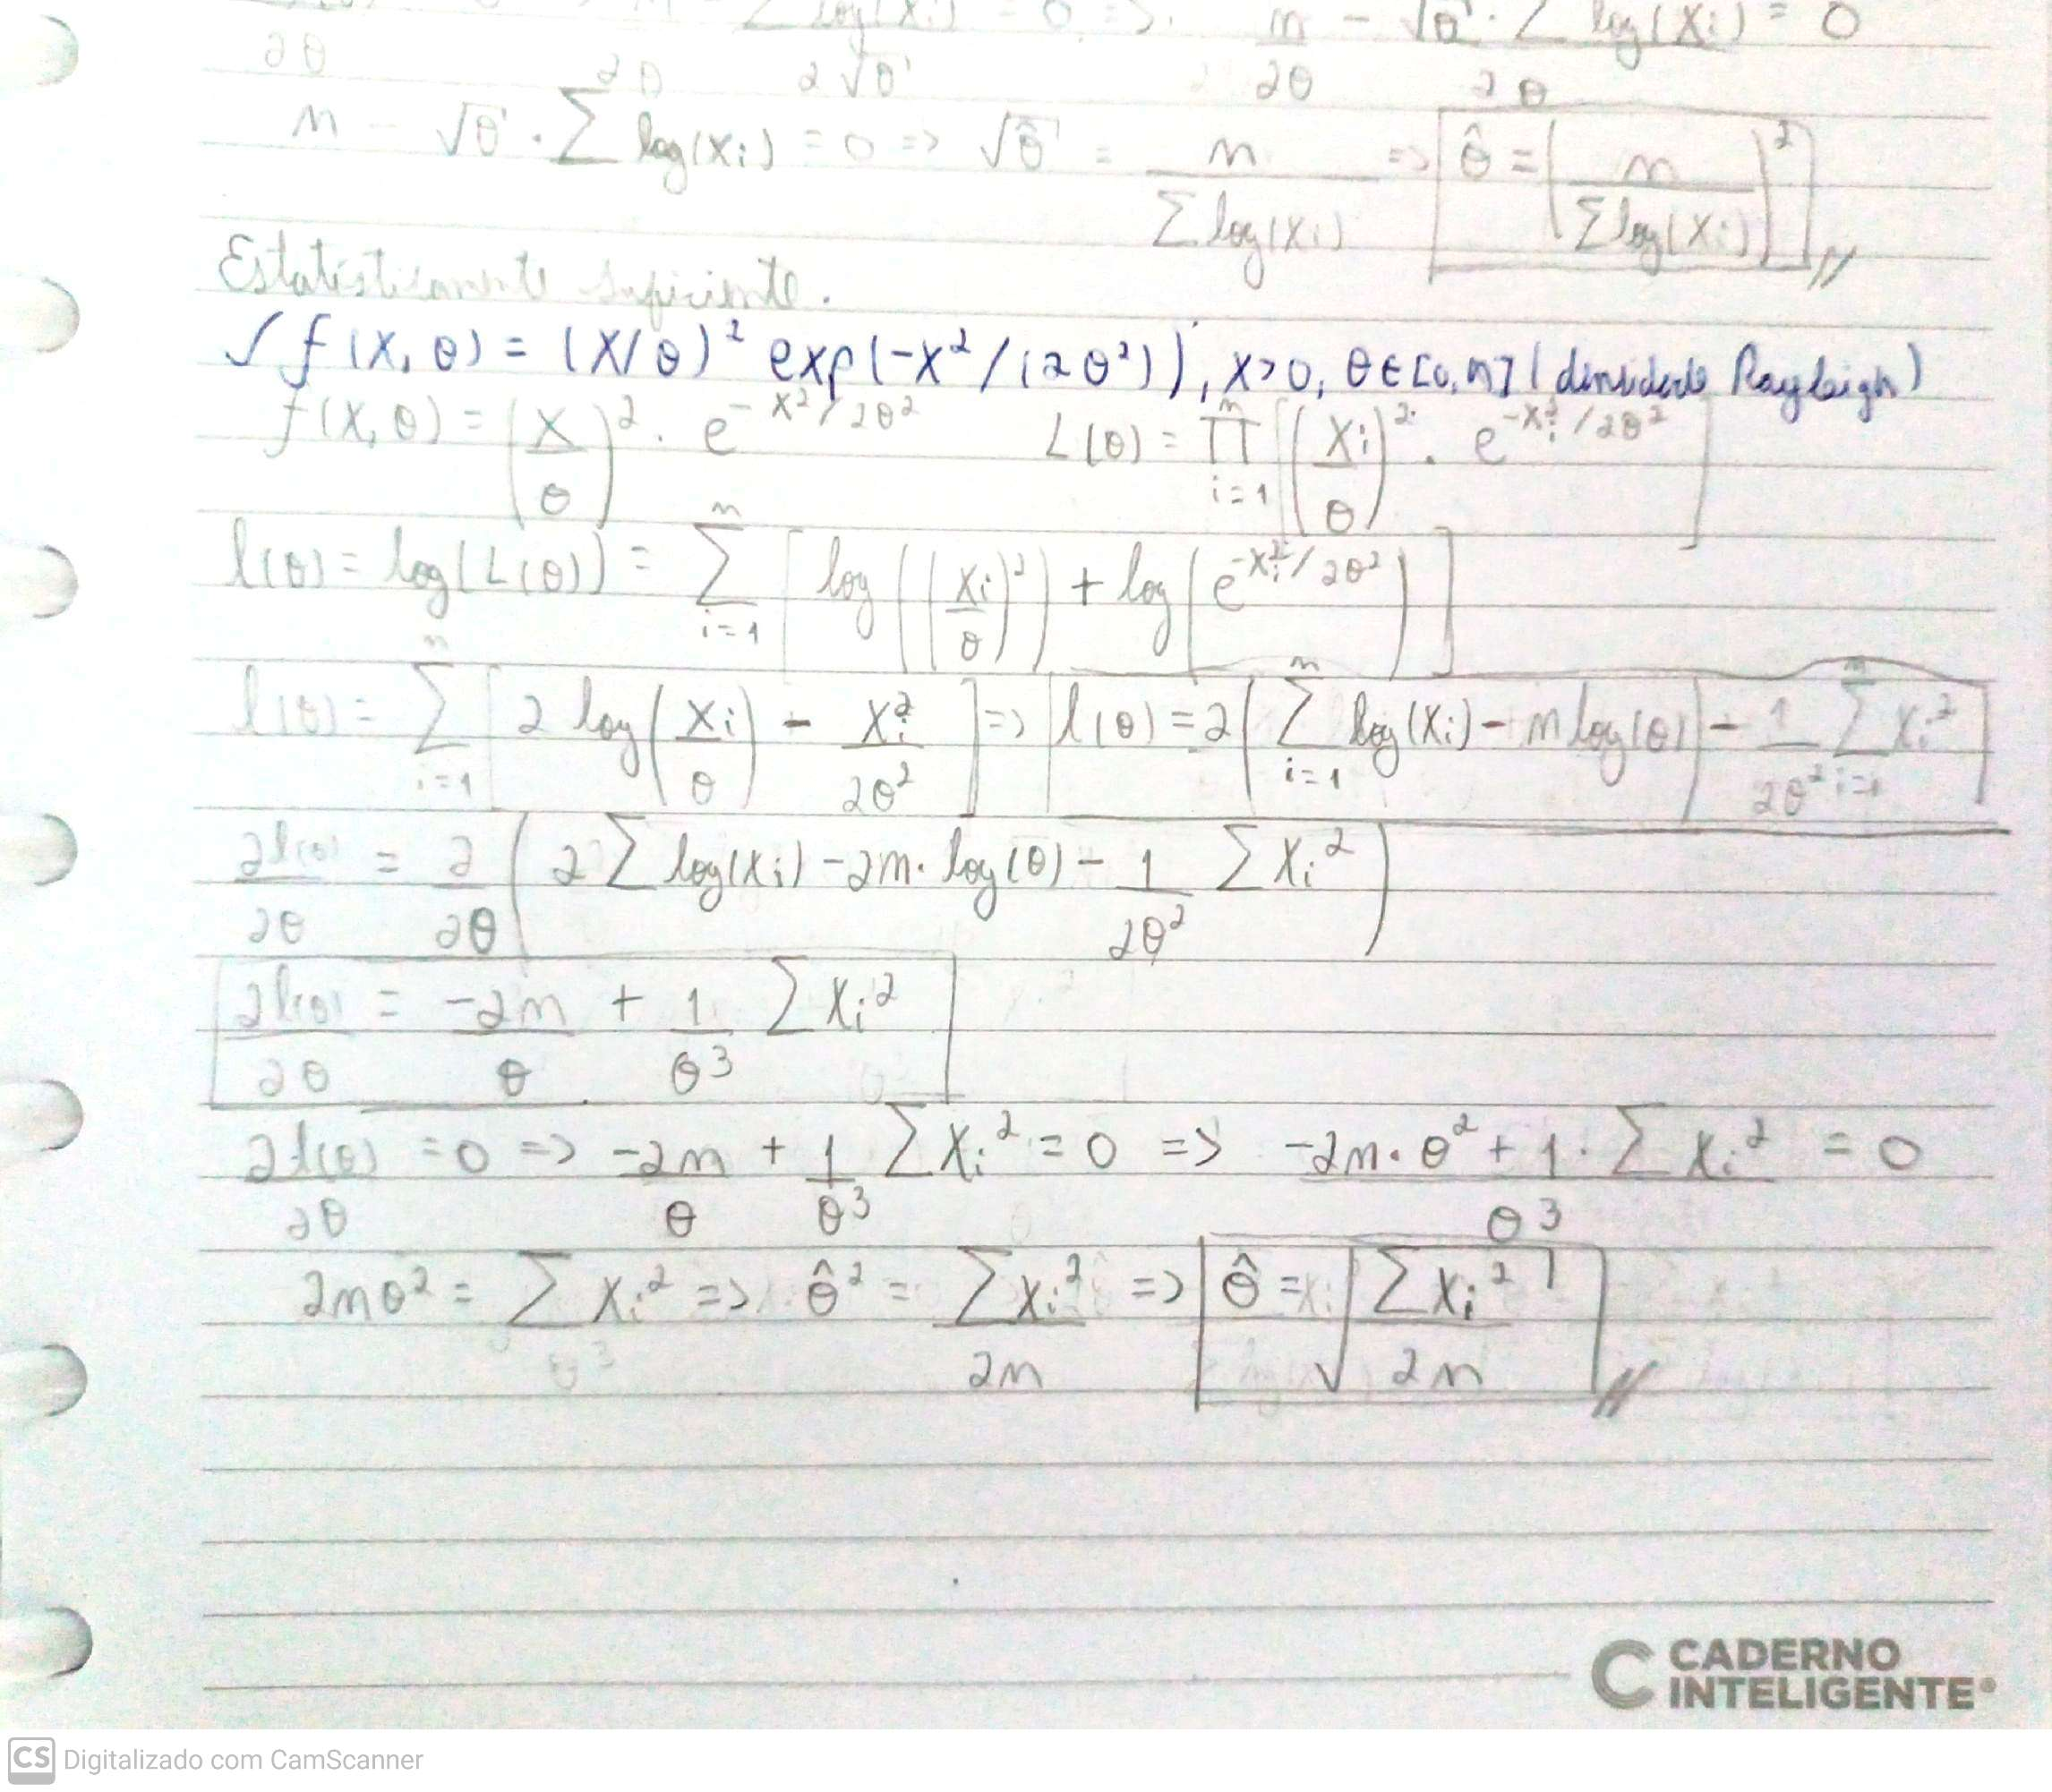

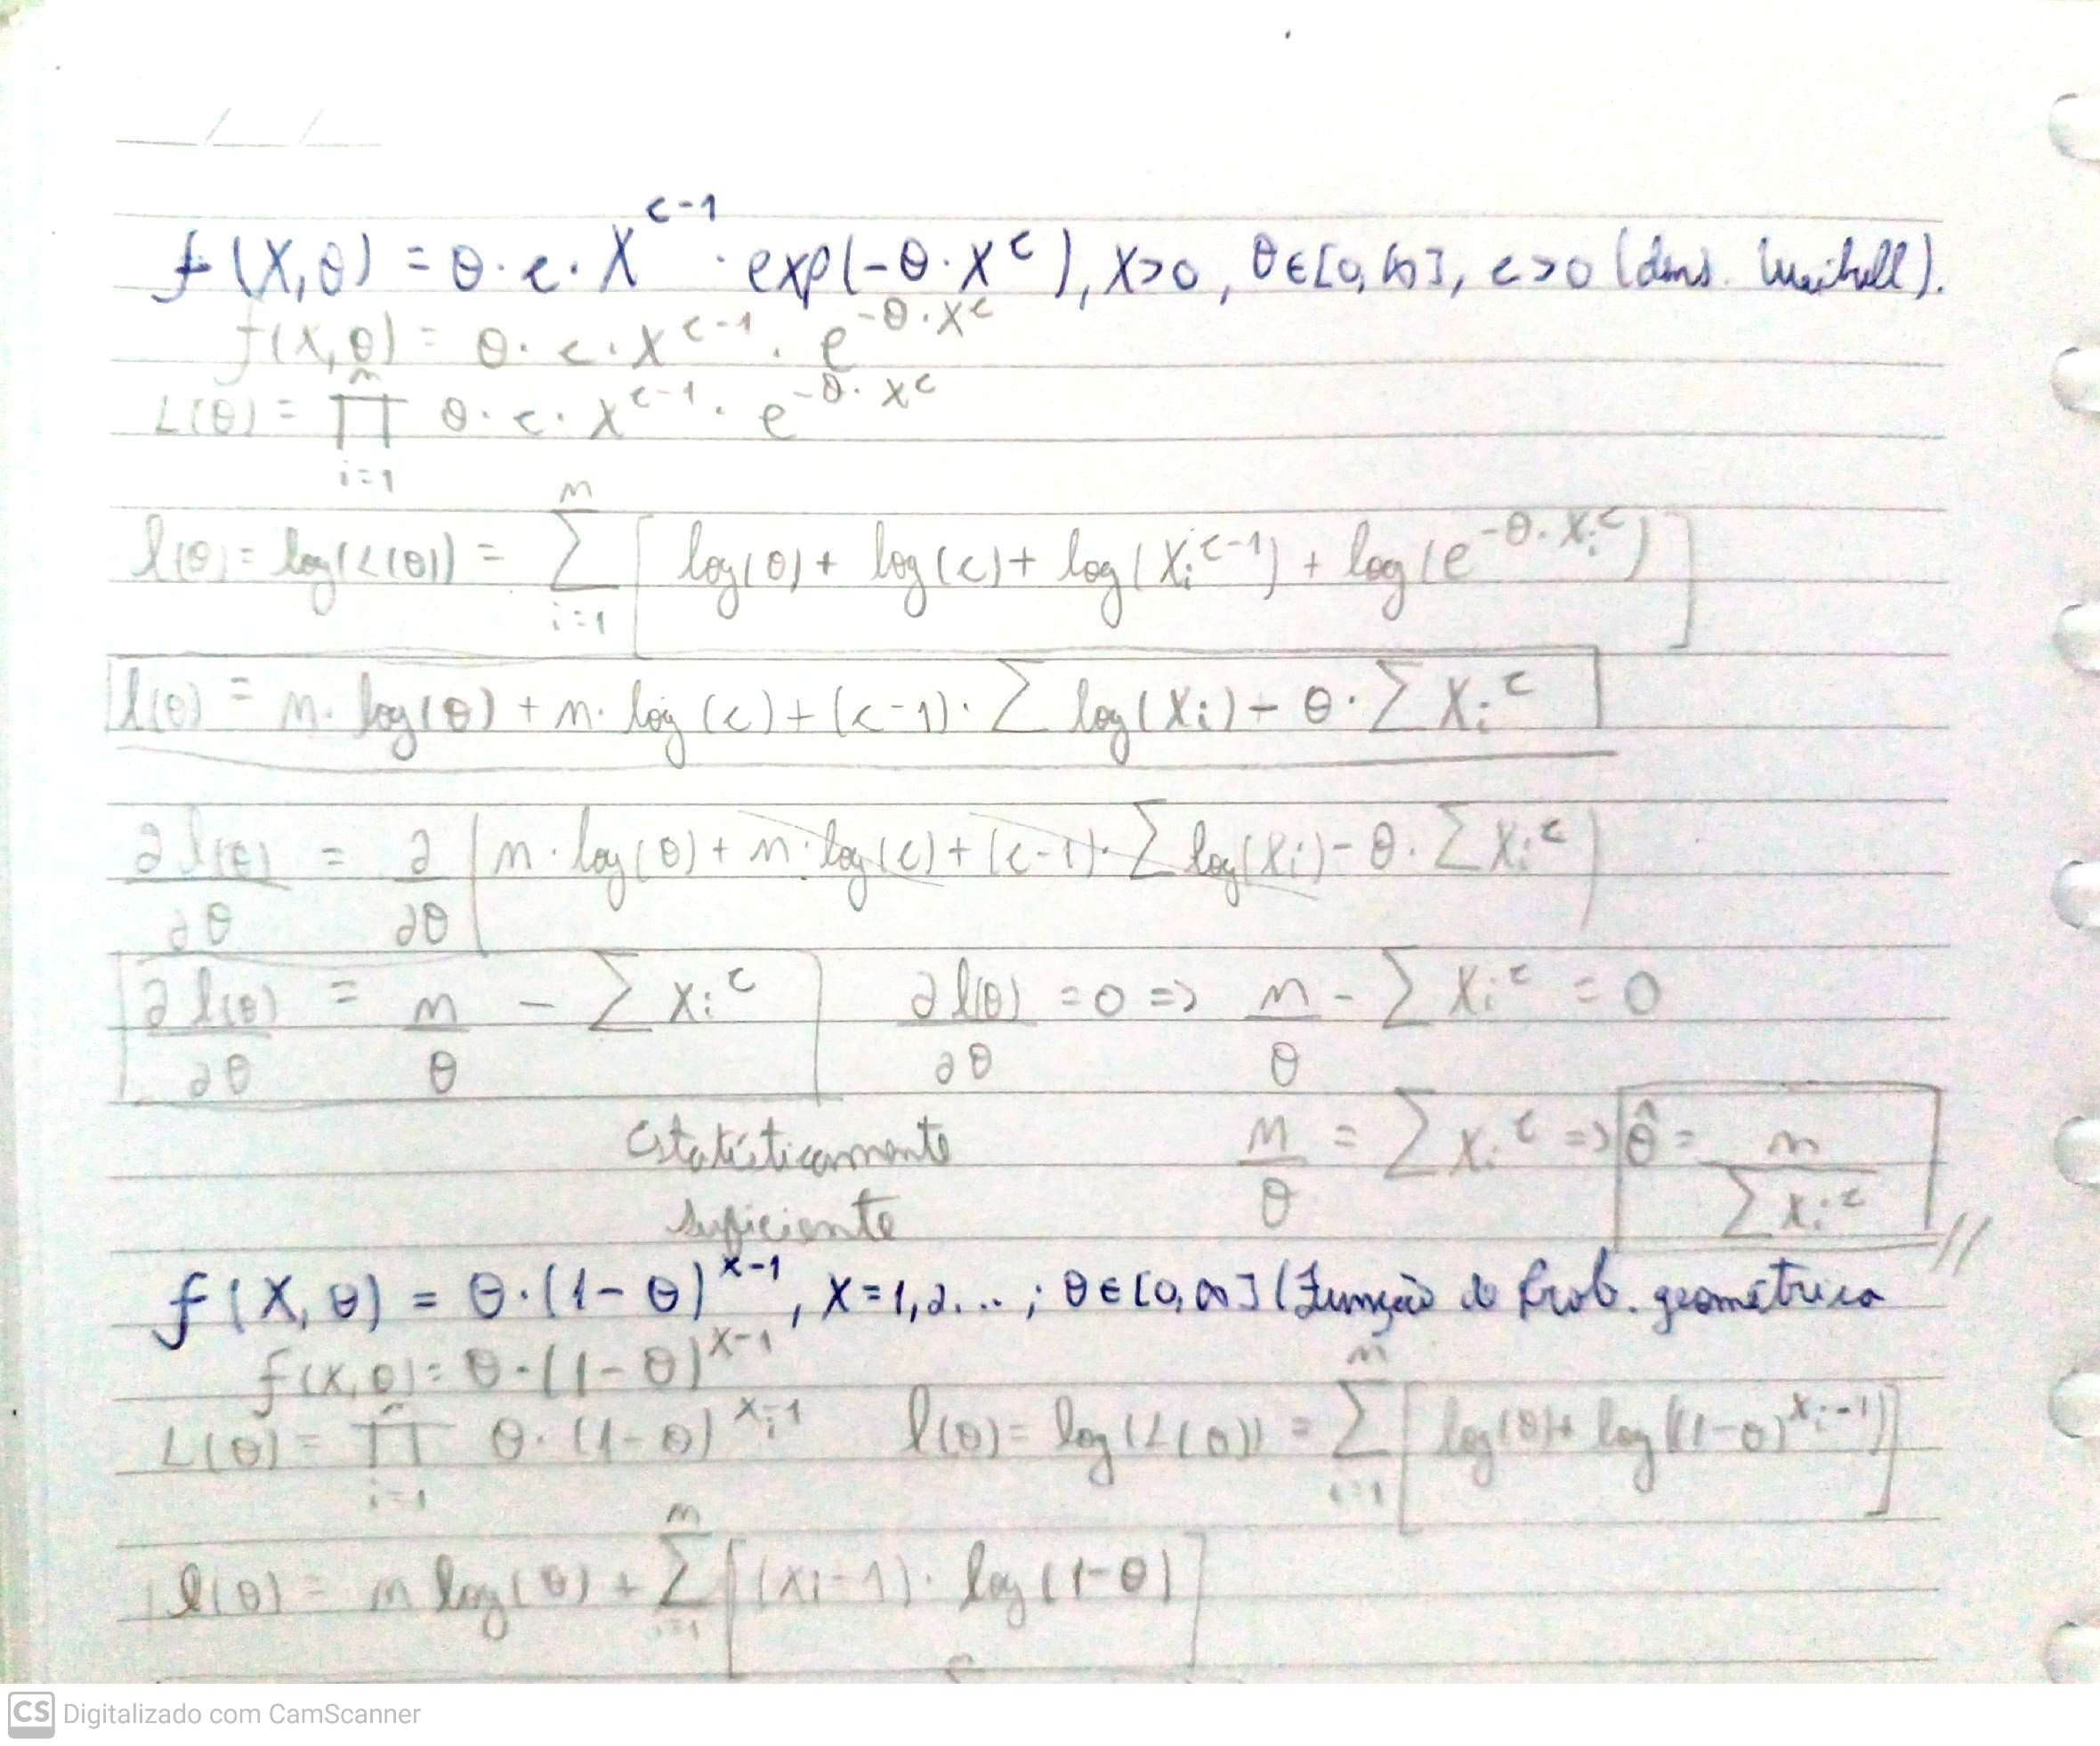

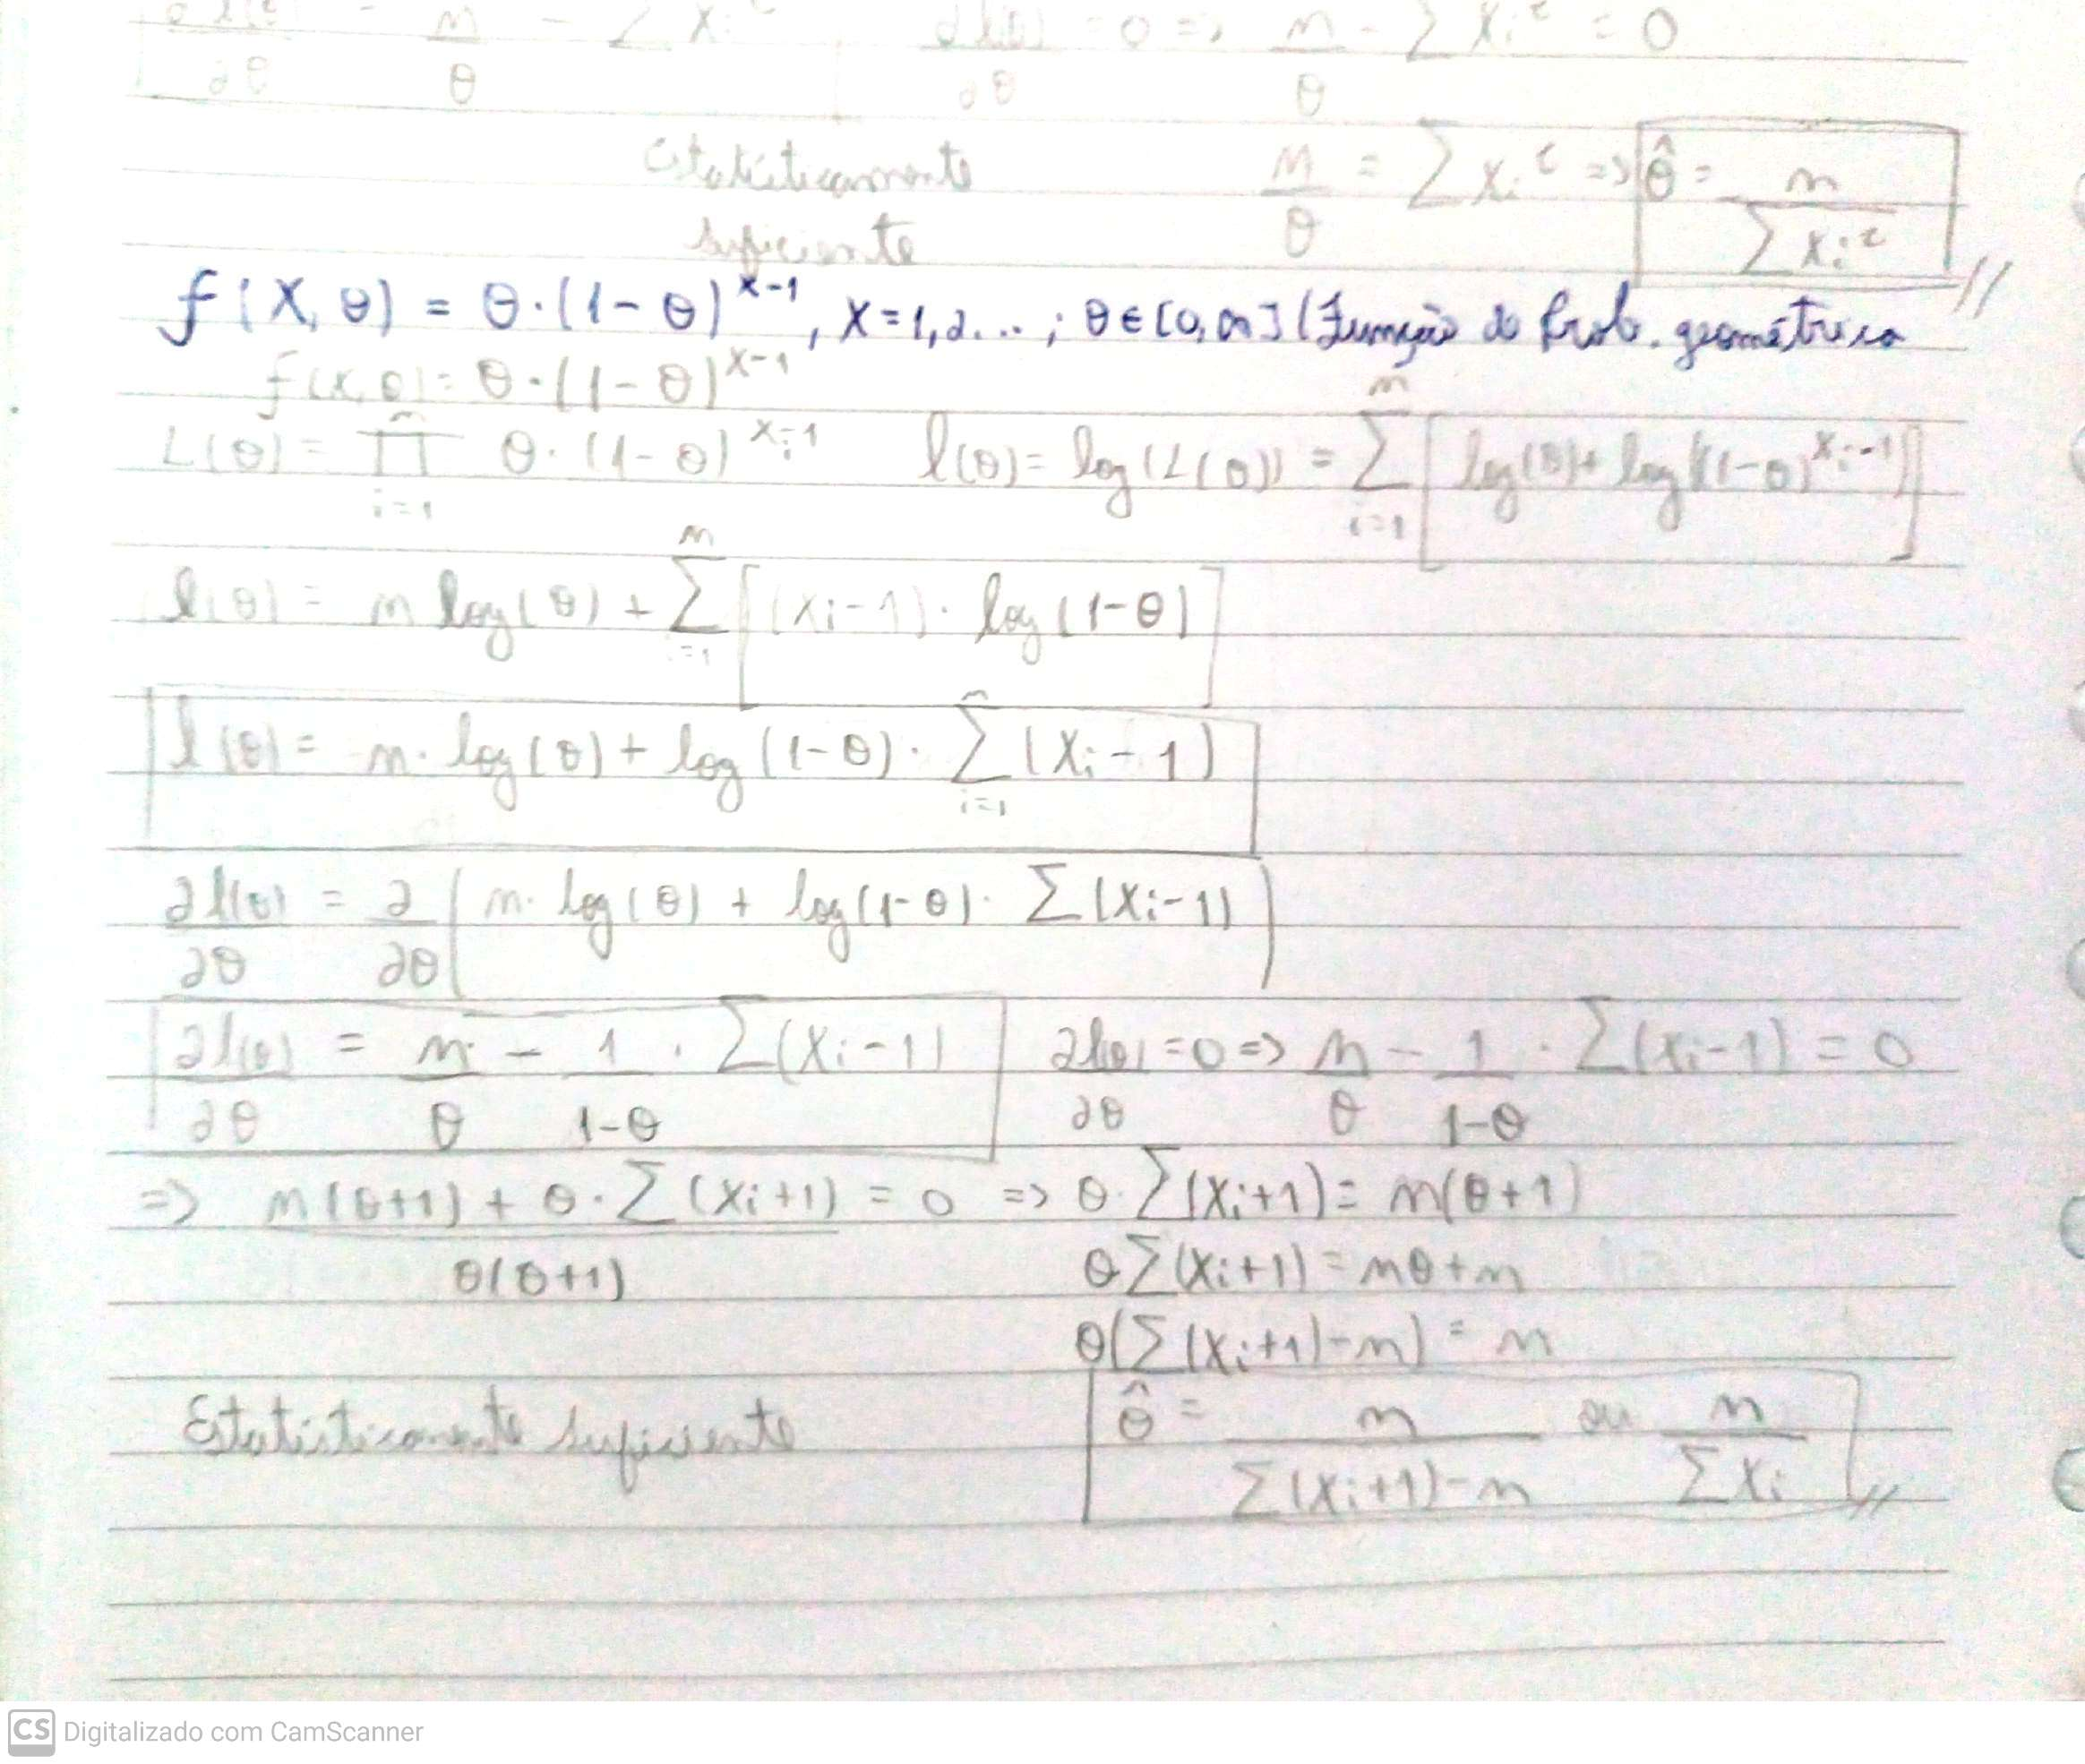

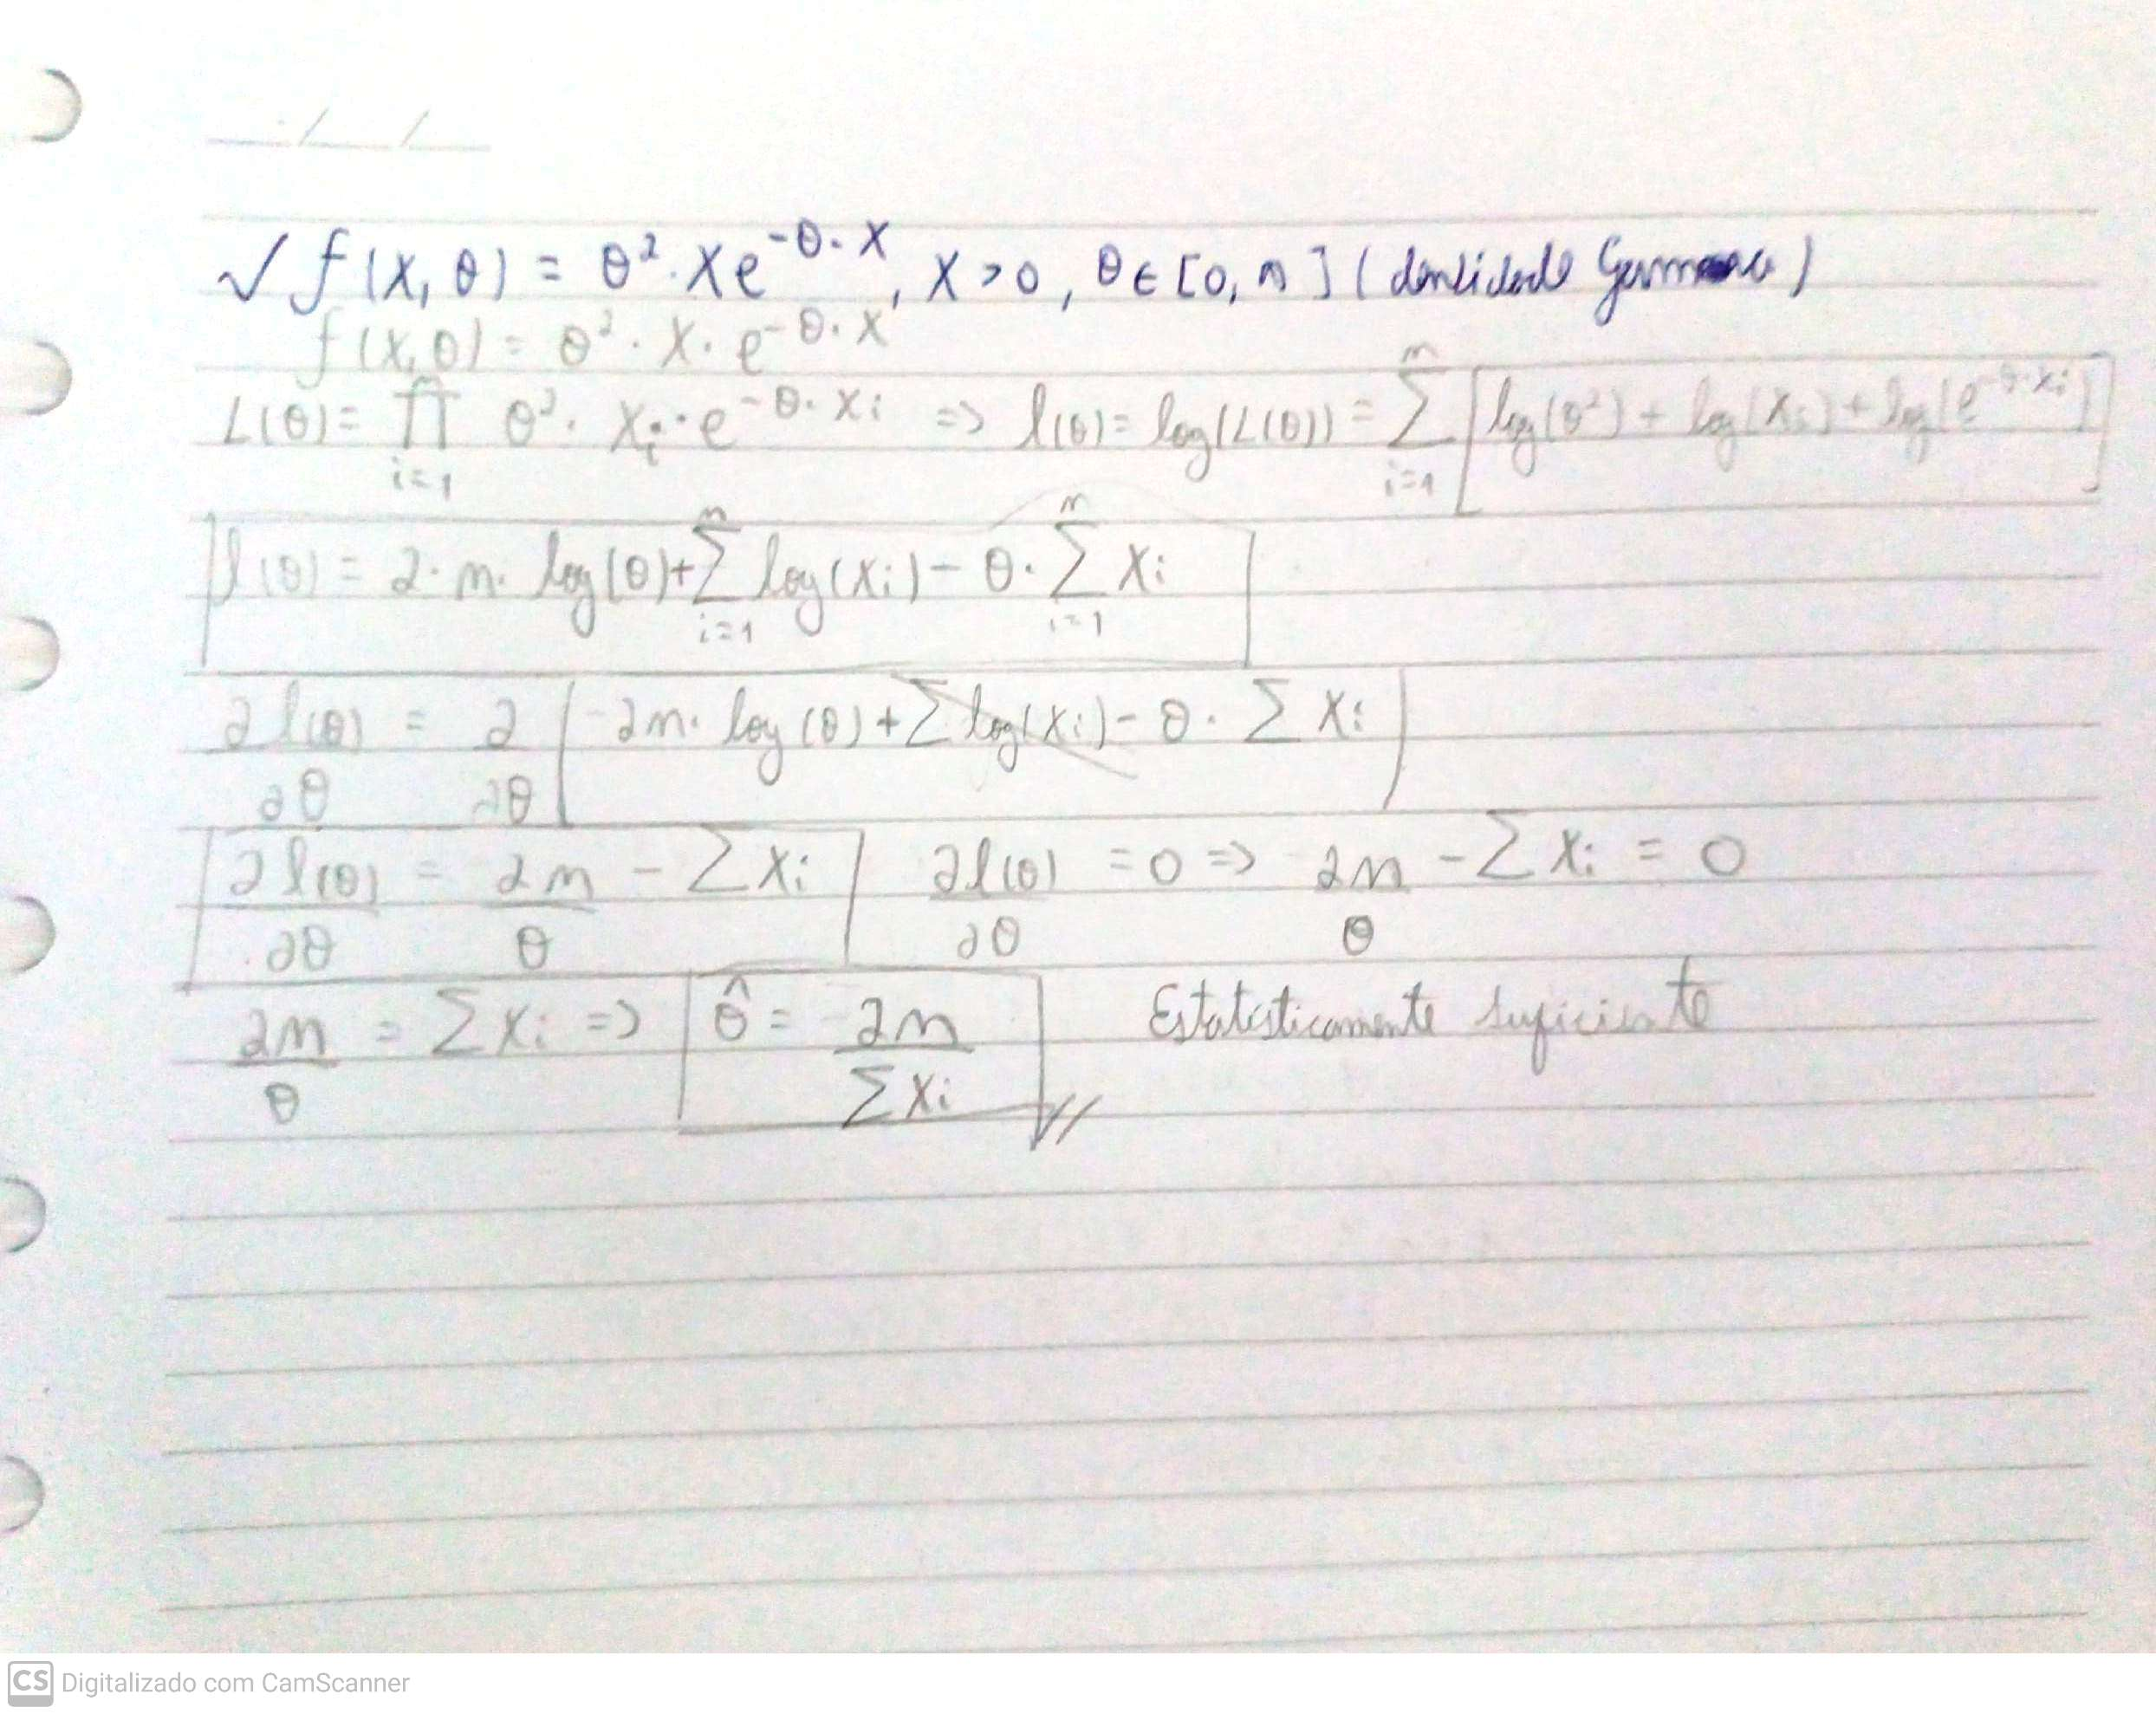

## Item 2

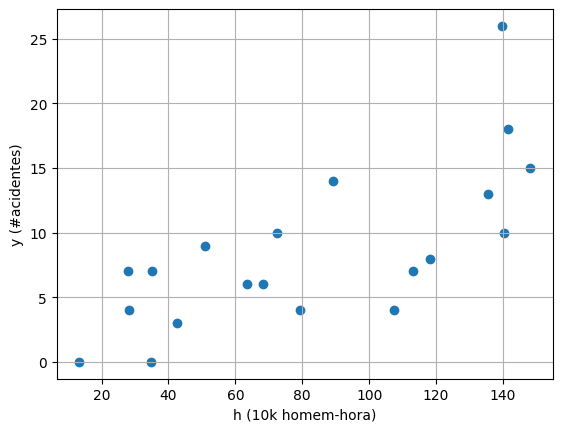

Theta_hat: 0.10365521003818876


In [6]:
import numpy as np
import matplotlib.pyplot as plt


h = np.array([118.3, 13.4, 68.3, 141.6, 113.1, 63.6, 135.5, 107.5, 35.2,
              28.1, 34.7, 42.5, 139.7, 140.4, 79.2, 148.2, 28, 72.4, 50.9, 89.1])
y = np.array([8, 0, 6, 18, 7, 6, 13, 4, 7,
              4, 0, 3, 26, 10, 4, 15, 7, 10, 9, 14])

plt.figure()
plt.scatter(h, y)
plt.xlabel("h (10k homem-hora)")
plt.ylabel("y (#acidentes)")
plt.grid()
plt.show()

theta_hat = np.sum(y) / np.sum(h)
print(f"Theta_hat: {theta_hat}")

Nota-se que há uma clara associação positiva entre o número de acidentes (y) e a quantidade de homem-hora (h) em uma empresa. À medida que a exposição ao trabalho (medida em homem-hora) aumenta, observa-se uma maior quantidade de acidentes. Isso ocorre porque, do ponto de vista probabilístico, quanto maior a exposição ao risco (ou seja, mais trabalhadores por mais tempo), maior a chance de que eventos como acidentes ocorram. Portanto, espera-se que empresas com maiores cargas de trabalho registrem, em média, mais acidentes.